<a href="https://colab.research.google.com/github/MoizAhmed2517/Time-Series-Forecasting-Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the BitCoin Forecasting

## Get Data

In [1]:
%cd /content/drive/MyDrive/ColabProjects

/content/drive/MyDrive/ColabProjects


In [ ]:
!pwd

/content/drive/MyDrive/ColabProjects


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-06 19:00:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-06-06 19:00:12 (13.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###Importing libraries

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from datetime import datetime
from sklearn.model_selection import train_test_split

##Performing Exploratory Analysis

In [3]:
df = pd.read_csv("data_BTC.csv", parse_dates=["Date"], index_col=["Date"])

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Closing Price (USD),2787.0,6529.845141,10887.847444,108.58483,460.087500,2780.18250,8506.923720,63346.789035
24h Open (USD),2787.0,6513.579485,10863.800772,108.58483,459.400500,2772.36750,8496.887593,63562.673545
24h High (USD),2787.0,6710.061683,11206.779756,118.67500,469.720995,2874.69625,8763.291985,64801.787870
24h Low (USD),2787.0,6302.417386,10475.811252,83.32833,450.818830,2696.45750,8221.060570,62094.632914


In [6]:
df.isnull().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


#### Code is clean. No data is missing no problem with datatype. Good to perform EDA.

**Questions:**



1.   How many year data it is? How many sample do we have?
2.   Which day BTC is highest and on which date it is lowest?
3.   What is rate of change BTC every week, fortnight, month, quarter, semi-anually and annual.




In [8]:
#AQ1: Answer
len(df)

2787

In [9]:
years = (df.index[-1] - df.index[0])/np.timedelta64(1, "Y")
months = (years - np.floor(years)) * 12.008
days = (months - np.floor(months)) * 30.417
print(f"Total data timeframe is: {int(years)} Years, {int(months)} Months, {int(days)} Days")

Total data timeframe is: 7 Years, 7 Months, 16 Days


#### We have collected data for 7 years 7 months and 16 days data. As DL model like lots of sample hence we are good to as we have total 2787 days of data but as in timeseries smaller number of smaples is often run into data problems.


#### **Note:** The Seasonality of a time series dataset is reffered as the number of samples per year. so for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning. We'll get 365 days

<Axes: xlabel='Date'>

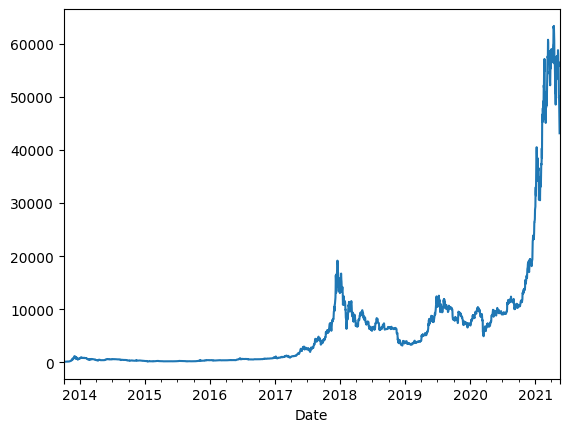

In [10]:
df['Closing Price (USD)'].plot()

In [11]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


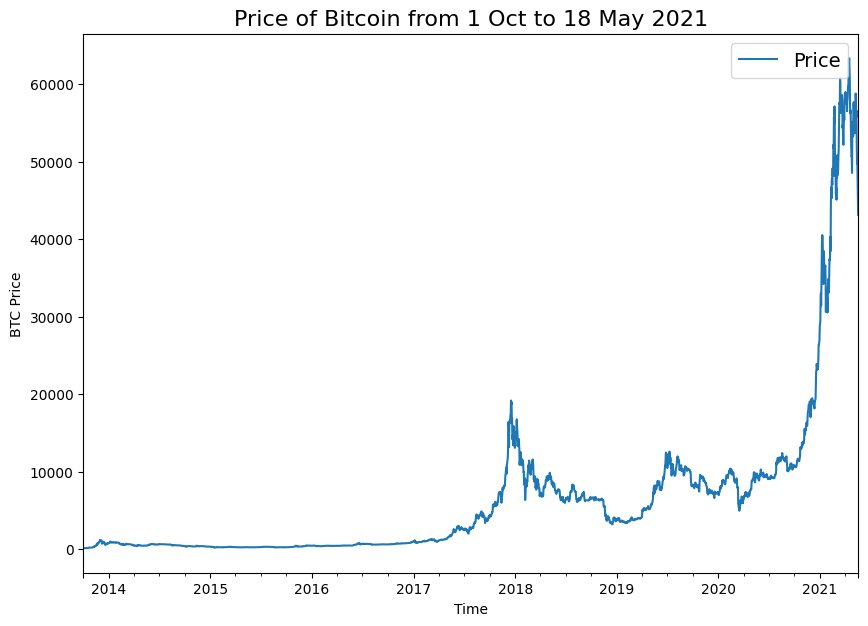

In [12]:
bitcoin.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.title("Price of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [13]:
# Q2: Answer
bitcoin[['Price']].idxmax()

Price   2021-04-16
dtype: datetime64[ns]

In [14]:
bitcoin[['Price']].idxmin()

Price   2013-10-03
dtype: datetime64[ns]

In [15]:
bitcoin.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789035


##Using Python CSV module for loading CSV files and plotting time series graph

In [16]:
time = []
price = []

with open('data_BTC.csv', "r", newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=",")
  next(spamreader, None)
  for row in spamreader:
    time.append(datetime.strptime(row[1], "%Y-%m-%d"))
    price.append(float(row[2]))

# price = price[:]
# time = time[:]

print(price)
print(time)

[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966, 125.9275, 126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355, 175.03166, 177.6965, 187.15983, 192.75666, 197.4, 196.02499, 198.04883, 198.93233, 200.543, 210.3075, 225.02, 248.25333, 262.32666, 294.48699, 331.10325, 285.8875, 304.97974, 338.137, 357.48, 402.954, 409.10375, 420.21649, 437.29725, 510.6025, 693.65, 531.54249, 574.71599, 681.33, 774.18, 746.19374, 768.8475, 789.36475, 893.1815, 934.355, 1068.363, 1154.92593, 1099.51926, 1019.78966, 1028.845, 1071.2848, 1139.33083, 1004.61633, 759.43041, 689.81, 841.83966, 916.77599, 967.42866, 866.29003, 911.23204, 889.81946, 848.9975, 868.95316, 653.80483, 654.06266, 553.69166, 693.05883, 649.38965, 595.95883, 647.68316, 671.58116, 659.84333, 702.00083, 758.01016, 734.01166, 717.92623, 752.82022, 744.17249, 768.40783, 769.09849, 804.02719,

#### Plotting function

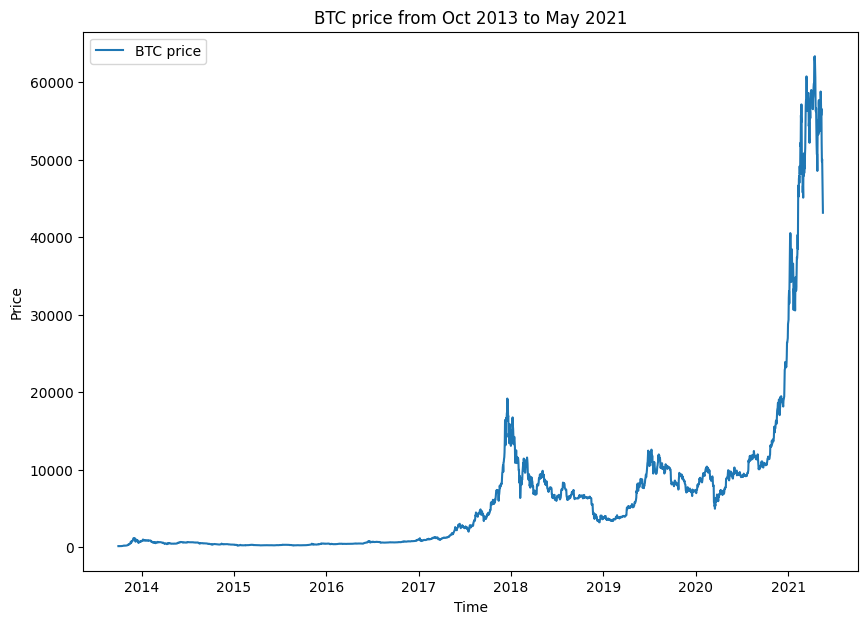

In [17]:
def plot_data(time, value):
  plt.figure(figsize=(10, 7))
  plt.plot(time, value, label="BTC price")
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.title("BTC price from Oct 2013 to May 2021")
  plt.legend()
  plt.show()


plot_data(time, price)

### Trai/Test Split (Wrong Way)

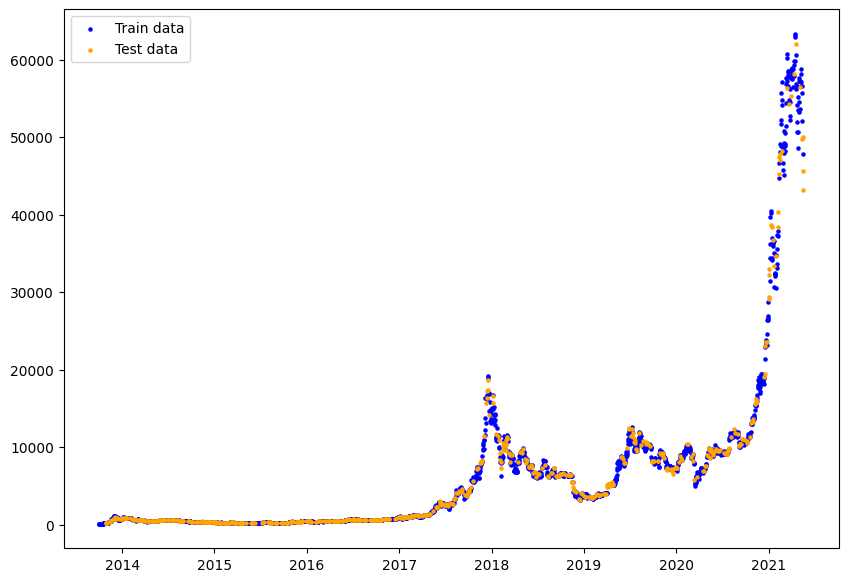

In [18]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color='blue', label="Train data")
plt.scatter(X_test, y_test, s=5, color='orange', label="Test data")
plt.legend()
plt.show() 

#### The randomness in data create problem in timeseries as we can see in above graph that randomness will eliminate the flow or conitinue of the data. It is not simulating the real situation. In timeseries we are trying to predict the future that's why due to random split our data can see the future values hence this issue in time series is called Data leakage.

### Train/Test Split (Right Way)

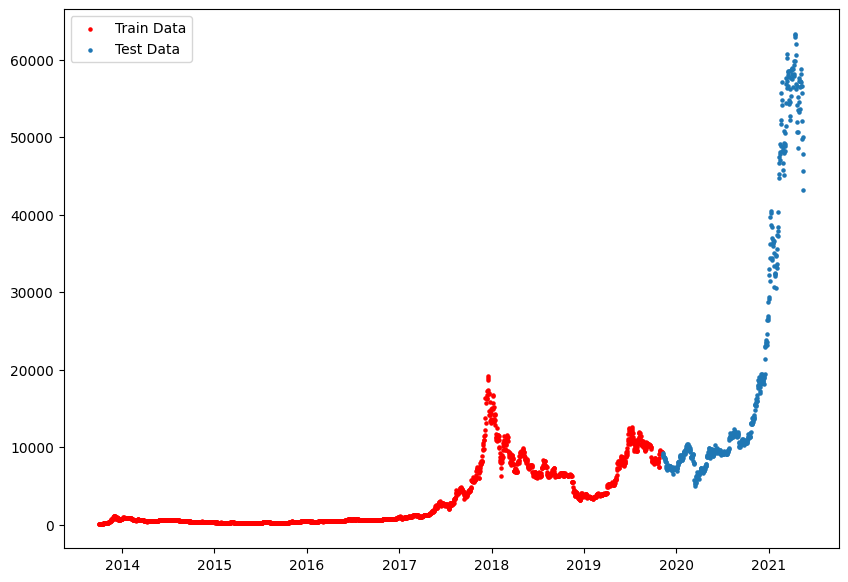

In [19]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, shuffle=False)
y_test = tf.constant(y_test)
y_test = tf.constant(y_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color="red", label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.legend()
plt.show();

In [20]:
#Creating a plotting function

def plot_timeSeries(X_train, y_train, X_test, y_test):
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, s=5, label="Train Data")
  plt.scatter(X_test, y_test, s=5, color="red", label="Test Data")
  plt.title()
  plt.legend()
  plt.show();

def timeSeries_plot(timeSteps, prices, format=".", start=0, end=None, label=None):
  plt.plot(timeSteps[start:end], prices[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

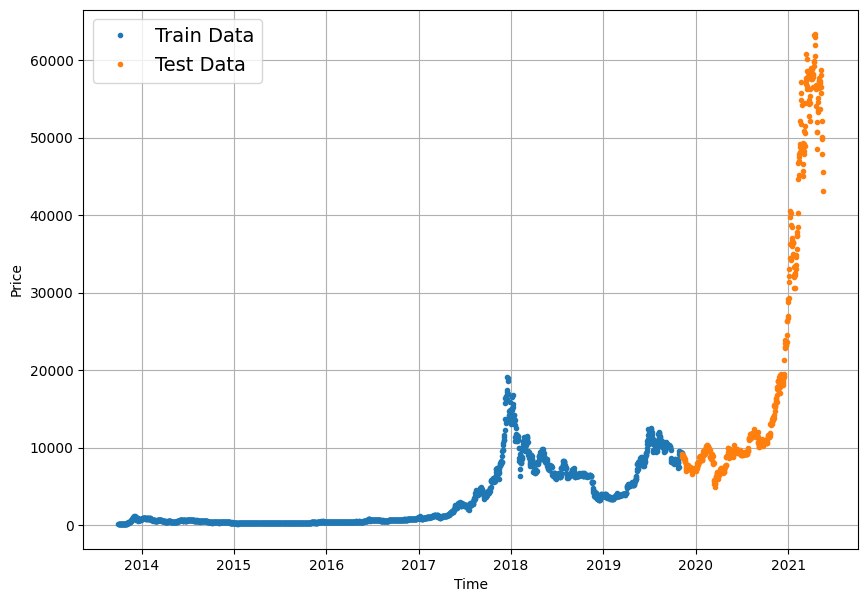

In [21]:
plt.figure(figsize=(10, 7))
timeSeries_plot(X_train, y_train, label="Train Data")
timeSeries_plot(X_test, y_test, label="Test Data")

## Modelling Experiments

####List of Experiments:

Experiment, horizon, window

* Naive Model (Baseline)
* Dense Model, 1, 7
* Same as Model_1, 1, 30
* Same as Model_2, 7, 30
* Conv1D
* LSTM
* Same as Model 1 (but with multivariate Data)
* N-BEATs algorithm
* Ensemble (multiple models stacked together)
* Future Prediction model
* Same as model 1 (but with turkey data introduced)

##Naive Forecast - Experiment#0

#### The formula for Naive Forecast is:

$$\hat{y}_{t} = y_{t-1}$$

Defination:
> The prediction at previous timestep t (y_hat) is equal to the the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [22]:
y_test[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9226.485 , 8794.358 , 8798.042 , 9081.187 , 8711.534 , 8760.893 ,
       8749.5205, 8656.971 , 8500.644 , 8469.261 ], dtype=float32)>

In [23]:
naive_forecast = y_test[:-1]

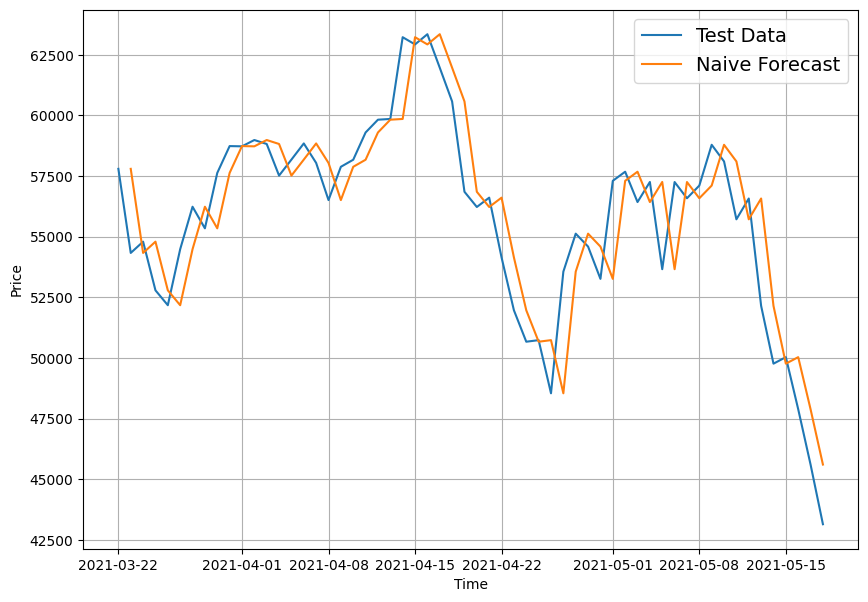

In [24]:
plt.figure(figsize=(10, 7))
# timeSeries_plot(timeSteps=X_train, prices=y_train, format=".", start=0, end=None, label="Train Data")
timeSeries_plot(timeSteps=X_test, prices=y_test, format="-", start=500, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[1:], prices=naive_forecast, format='-', start=500, label="Naive Forecast")

> Why naive forecast is hard to beat, does the term autorgressive come up?

#### Evaluating the forecasting Model

We need regression matrix

* Root Mean Square Error (RMSE) *-Can be used with any regression problem*
* Mean Absolute Error (MAE) *-Can be used when larger error are more significant than small errors*
* Mean Squared Error (MSE) *-Can be used when larger error are more significant than small errors but it is more interpretable*
* R-squared
* Huber Loss *-Combo of MAE and MSE. Less sensitive to outliers than MSE*
* Mean Absolute percentage error (MAPE/sMAPE) *-It is recommended not to use by Hyndman & Koehler but you need to use your intution that which one is performing best. Mostly use in M-competitions*
* Mean Absolute scaled error (MASE) *-A scaled error > 1 if the forecast is worse than the naive and <1 if the forecast is better than naive*


**How our model;s forecast (y_pred) compared against the actual values (y_true or ground truth values)?**



In [25]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is of 1 day
  return mae / mae_naive_no_season

In [26]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.99957

In [27]:
def time_series_evaluation_metrics(y_true, y_pred):
  try:
    if y_pred.shape[1] > 1:
      mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
      mse = tf.reduce_mean(tf.keras.metrics.mean_squared_error(y_true, y_pred))
      rmse = tf.reduce_mean(tf.sqrt(mse))
      mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
      mase = tf.reduce_mean(mean_absolute_scaled_error(y_true, y_pred))
  except:
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()}

In [28]:
naive_result = time_series_evaluation_metrics(y_test[1:], naive_forecast)
naive_result

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [29]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=20056.635>

In [30]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float32, numpy=63346.79>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4944.702>)

In [31]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_max(y_test).numpy() * 100} %")

0.8966203778982162 %


In [32]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_min(y_test).numpy() * 100} %")

11.486642062664032 %


In [33]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_mean(y_test).numpy() * 100} %")

2.8318820521235466 %


#### We want to convert our data into windows

In [34]:
HORIZON = 1
WINDOW = 7
def get_labelled_windows(data, horizon=HORIZON, window=WINDOW):
  """
  Create labels for windowed dataset.

  E.g.
  Input: [1, 2, 3, 4, 5, 6, 7, 8] -> Output: ([1, 2, 3, 4, 5, 6, 7], [8])
  """

  return data[:, :-horizon], data[:, -horizon:]

In [35]:
array = np.array(price)
window_array = np.array([[]])
for i in range(0, len(array), 1):
  temp_list = price[i:i+8]
  # print(temp_list[:7], temp_list[-1])

In [36]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

full_windows, full_labels = make_windows(array)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning windows into training and test sets

In [37]:
def make_train_test_split(windows, labels, split=0.2):
  split_size = int(len(windows) * (1-split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [39]:
#checking if y_train anf train_label dataset are equal
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW:])

True

### Creating a Modelling checkpoint

> Our model performance will fluctuate from experiment to experiment, we are goinf to write a model checkpoint so we can compare apples to apples. We want to compare each of our models best performances against the other models best performance.

In [40]:
import os
from tensorflow.keras import layers

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon = 1)

We will be making a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam Optimization and MAE loss function
* batch size of 128
* 100 epochs

In [41]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="Model")

model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae", "mse"])

history_1 = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2867.0017 - mae: 2867.0017 - mse: 20935330.0000  

18/18 [==============================] - 8s 117ms/step - loss: 2351.5674 - mae: 2351.5674 - mse: 15590820.0000 - val_loss: 3330.4099 - val_mae: 3330.4099 - val_mse: 21856114.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 387.5864 - mae: 387.5864 - mse: 552347.0000

18/18 [==============================] - 1s 33ms/step - loss: 328.6093 - mae: 328.6093 - mse: 405755.4062 - val_loss: 1256.6022 - val_mae: 1256.6022 - val_mse: 4193416.2500
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 216.4627 - mae: 216.4627 - mse: 215409.2344

18/18 [==============================] - 1s 33ms/step - loss: 213.0081 - mae: 213.0081 - mse: 214740.5000 - val_loss: 967.3336 - val_mae: 967.3336 - val_mse: 3141240.5000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 219.7684 - mae: 219.7684 - mse: 256903.0312

18/18 [==============================] - 1s 34ms/step - loss: 178.1562 - mae: 178.1562 - mse: 163995.1875 - val_loss: 948.0466 - val_mae: 948.0466 - val_mse: 3052014.5000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 177.7291 - mae: 177.7291 - mse: 109133.2031

18/18 [==============================] - 1s 32ms/step - loss: 171.3622 - mae: 171.3622 - mse: 155267.9219 - val_loss: 943.8930 - val_mae: 943.8930 - val_mse: 2891715.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4758 - mae: 125.4758 - mse: 62512.6875

18/18 [==============================] - 1s 33ms/step - loss: 166.1927 - mae: 166.1927 - mse: 148101.1875 - val_loss: 917.3162 - val_mae: 917.3162 - val_mse: 2864126.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 197.9448 - mae: 197.9448 - mse: 283359.7500

18/18 [==============================] - 1s 32ms/step - loss: 163.0958 - mae: 163.0958 - mse: 143644.5312 - val_loss: 915.9391 - val_mae: 915.9391 - val_mse: 2706304.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9024 - mae: 137.9024 - mse: 72800.8906

18/18 [==============================] - 1s 34ms/step - loss: 159.6193 - mae: 159.6193 - mse: 139045.6719 - val_loss: 885.0920 - val_mae: 885.0920 - val_mse: 2611580.7500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 159.2582 - mae: 159.2582 - mse: 137239.7500 - val_loss: 923.2791 - val_mae: 923.2791 - val_mse: 2627432.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 171.7745 - mae: 171.7745 - mse: 212038.5469

18/18 [==============================] - 1s 35ms/step - loss: 156.1138 - mae: 156.1138 - mse: 133465.9062 - val_loss: 857.6887 - val_mae: 857.6887 - val_mse: 2450410.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 170.5857 - mae: 170.5857 - mse: 128354.2812

18/18 [==============================] - 1s 34ms/step - loss: 153.2046 - mae: 153.2046 - mse: 127777.0234 - val_loss: 843.1566 - val_mae: 843.1566 - val_mse: 2367237.2500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 150.3985 - mae: 150.3985 - mse: 123687.6250 - val_loss: 924.6194 - val_mae: 924.6194 - val_mse: 2513391.0000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 119.2322 - mae: 119.2322 - mse: 91112.8438

18/18 [==============================] - 1s 33ms/step - loss: 149.6425 - mae: 149.6425 - mse: 123886.6172 - val_loss: 822.1481 - val_mae: 822.1481 - val_mse: 2213983.2500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 155.8658 - mae: 155.8658 - mse: 115609.5312

18/18 [==============================] - 1s 32ms/step - loss: 143.9126 - mae: 143.9126 - mse: 115778.8125 - val_loss: 819.9136 - val_mae: 819.9136 - val_mse: 2124910.0000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 143.1863 - mae: 143.1863 - mse: 76149.0234

18/18 [==============================] - 1s 47ms/step - loss: 141.1783 - mae: 141.1783 - mse: 110325.9844 - val_loss: 809.4400 - val_mae: 809.4400 - val_mse: 2038097.0000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6930 - mae: 127.6930 - mse: 72527.6250

18/18 [==============================] - 1s 32ms/step - loss: 136.3652 - mae: 136.3652 - mse: 105175.8359 - val_loss: 765.4764 - val_mae: 765.4764 - val_mse: 1900608.5000
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 135.0399 - mae: 135.0399 - mse: 102636.9844 - val_loss: 767.3697 - val_mae: 767.3697 - val_mse: 1869463.3750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5904 - mae: 140.5904 - mse: 90346.9375

18/18 [==============================] - 1s 33ms/step - loss: 133.8377 - mae: 133.8377 - mse: 101937.0234 - val_loss: 751.3289 - val_mae: 751.3289 - val_mse: 1802528.0000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 74.3190 - mae: 74.3190 - mse: 28571.3359

18/18 [==============================] - 1s 33ms/step - loss: 132.8484 - mae: 132.8484 - mse: 98571.6016 - val_loss: 720.1212 - val_mae: 720.1212 - val_mse: 1712122.7500
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 135.5824 - mae: 135.5824 - mse: 101896.6875 - val_loss: 770.5895 - val_mae: 770.5895 - val_mse: 1962115.6250
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 131.3336 - mae: 131.3336 - mse: 91437.4453 

18/18 [==============================] - 1s 49ms/step - loss: 132.1476 - mae: 132.1476 - mse: 97433.3047 - val_loss: 701.2756 - val_mae: 701.2756 - val_mse: 1669182.1250
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 136.8262 - mae: 136.8262 - mse: 106927.5859

18/18 [==============================] - 1s 48ms/step - loss: 128.2795 - mae: 128.2795 - mse: 93411.3203 - val_loss: 689.2746 - val_mae: 689.2746 - val_mse: 1617109.1250
Epoch 23/100
13/18 [====================>.........] - ETA: 0s - loss: 119.7620 - mae: 119.7620 - mse: 78271.7188

18/18 [==============================] - 1s 47ms/step - loss: 124.1864 - mae: 124.1864 - mse: 89601.2266 - val_loss: 676.4496 - val_mae: 676.4496 - val_mse: 1549635.7500
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 123.0306 - mae: 123.0306 - mse: 93351.9922

18/18 [==============================] - 1s 47ms/step - loss: 122.7389 - mae: 122.7389 - mse: 87955.7891 - val_loss: 670.7951 - val_mae: 670.7951 - val_mse: 1514661.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 130.7439 - mae: 130.7439 - mse: 69369.2812

18/18 [==============================] - 1s 33ms/step - loss: 121.4717 - mae: 121.4717 - mse: 85138.7812 - val_loss: 660.3047 - val_mae: 660.3047 - val_mse: 1496865.3750
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 122.4889 - mae: 122.4889 - mse: 84830.4375 - val_loss: 681.1620 - val_mae: 681.1620 - val_mse: 1571232.2500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 184.2580 - mae: 184.2580 - mse: 165217.2812

18/18 [==============================] - 1s 34ms/step - loss: 122.4976 - mae: 122.4976 - mse: 86529.2578 - val_loss: 646.9991 - val_mae: 646.9991 - val_mse: 1442866.3750
Epoch 28/100
 9/18 [==============>...............] - ETA: 0s - loss: 124.7756 - mae: 124.7756 - mse: 86707.0000

18/18 [==============================] - 1s 37ms/step - loss: 119.0016 - mae: 119.0016 - mse: 82256.1562 - val_loss: 640.3652 - val_mae: 640.3652 - val_mse: 1412196.8750
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3631 - mae: 120.3631 - mse: 83843.3828 - val_loss: 647.4075 - val_mae: 647.4075 - val_mse: 1405429.3750
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 120.2569 - mae: 120.2569 - mse: 82594.3984 - val_loss: 686.2299 - val_mae: 686.2299 - val_mse: 1488991.2500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0675 - mae: 127.0675 - mse: 87095.3047 - val_loss: 791.6457 - val_mae: 791.6457 - val_mse: 1786146.1250
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 122.4261 - mae: 122.4261 - mse: 82302.8906 - val_loss: 670.3500 - val_mae: 670.3500 - val_mse: 1443772.5000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0569 - mae: 117.0569 - m

18/18 [==============================] - 1s 34ms/step - loss: 120.2124 - mae: 120.2124 - mse: 83167.7188 - val_loss: 625.5036 - val_mae: 625.5036 - val_mse: 1332957.7500
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7785 - mae: 116.7785 - mse: 80234.2812 - val_loss: 668.2234 - val_mae: 668.2234 - val_mse: 1429621.1250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 126.2925 - mae: 126.2925 - mse: 84493.1328 - val_loss: 760.5966 - val_mae: 760.5966 - val_mse: 1677889.8750
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9607 - mae: 120.9607 - mse: 78926.5938 - val_loss: 651.1467 - val_mae: 651.1467 - val_mse: 1383285.8750
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7161 - mae: 106.7161 - mse: 67375.0938

18/18 [==============================] - 1s 33ms/step - loss: 115.0920 - mae: 115.0920 - mse: 77433.4844 - val_loss: 607.9491 - val_mae: 607.9491 - val_mse: 1286546.3750
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2183 - mae: 116.2183 - mse: 78749.7578 - val_loss: 701.5316 - val_mae: 701.5316 - val_mse: 1562480.6250
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 115.1970 - mae: 115.1970 - mse: 104928.9219

18/18 [==============================] - 1s 33ms/step - loss: 116.1830 - mae: 116.1830 - mse: 77853.4922 - val_loss: 606.4796 - val_mae: 606.4796 - val_mse: 1289911.1250
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2935 - mae: 115.2935 - mse: 77695.7266 - val_loss: 646.2650 - val_mae: 646.2650 - val_mse: 1396279.7500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9945 - mae: 113.9945 - mse: 61652.7656

18/18 [==============================] - 1s 35ms/step - loss: 116.5449 - mae: 116.5449 - mse: 79364.9609 - val_loss: 599.4020 - val_mae: 599.4020 - val_mse: 1261560.0000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7948 - mae: 111.7948 - mse: 74443.1484 - val_loss: 618.6680 - val_mae: 618.6680 - val_mse: 1318437.8750
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5823 - mae: 113.5823 - mse: 76783.0000 - val_loss: 604.1707 - val_mae: 604.1707 - val_mse: 1278321.7500
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 77.9122 - mae: 77.9122 - mse: 36547.7656

18/18 [==============================] - 1s 33ms/step - loss: 110.4188 - mae: 110.4188 - mse: 74435.8672 - val_loss: 594.1168 - val_mae: 594.1168 - val_mse: 1248114.3750
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9807 - mae: 111.9807 - mse: 75188.1484 - val_loss: 611.7853 - val_mae: 611.7853 - val_mse: 1295499.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3772 - mae: 111.3772 - mse: 75786.4375 - val_loss: 599.4843 - val_mae: 599.4843 - val_mse: 1251406.7500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3797 - mae: 110.3797 - mse: 73983.4062 - val_loss: 651.8613 - val_mae: 651.8613 - val_mse: 1365693.7500
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 170.7472 - mae: 170.7472 - mse: 132647.7969

18/18 [==============================] - 1s 34ms/step - loss: 113.6362 - mae: 113.6362 - mse: 75285.7812 - val_loss: 588.9773 - val_mae: 588.9773 - val_mse: 1230707.0000
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.5577 - mae: 136.5577 - mse: 142561.5000

18/18 [==============================] - 1s 48ms/step - loss: 111.6795 - mae: 111.6795 - mse: 74421.1094 - val_loss: 587.8220 - val_mae: 587.8220 - val_mse: 1227516.7500
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 88.8699 - mae: 88.8699 - mse: 49645.6758

18/18 [==============================] - 1s 33ms/step - loss: 111.9529 - mae: 111.9529 - mse: 74664.6094 - val_loss: 587.1320 - val_mae: 587.1320 - val_mse: 1224454.3750
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6512 - mae: 112.6512 - mse: 75989.4531 - val_loss: 594.9673 - val_mae: 594.9673 - val_mse: 1246931.0000
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 62.4026 - mae: 62.4026 - mse: 23001.1914

18/18 [==============================] - 1s 34ms/step - loss: 113.1790 - mae: 113.1790 - mse: 75598.9844 - val_loss: 586.9063 - val_mae: 586.9063 - val_mse: 1221222.0000
Epoch 54/100
15/18 [========================>.....] - ETA: 0s - loss: 111.2931 - mae: 111.2931 - mse: 75658.7578

18/18 [==============================] - 1s 33ms/step - loss: 110.1227 - mae: 110.1227 - mse: 73533.5391 - val_loss: 583.5037 - val_mae: 583.5037 - val_mse: 1215833.3750
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7020 - mae: 126.7020 - mse: 100350.0938

18/18 [==============================] - 1s 38ms/step - loss: 112.4269 - mae: 112.4269 - mse: 76602.7656 - val_loss: 583.0187 - val_mae: 583.0187 - val_mse: 1213676.5000
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 109.4069 - mae: 109.4069 - mse: 73012.7734 - val_loss: 747.8555 - val_mae: 747.8555 - val_mse: 1670145.5000
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 125.9668 - mae: 125.9668 - mse: 84761.4297 - val_loss: 691.2504 - val_mae: 691.2504 - val_mse: 1494229.2500
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 119.5562 - mae: 119.5562 - mse: 79166.1094 - val_loss: 679.3498 - val_mae: 679.3498 - val_mse: 1458079.6250
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1549 - mae: 111.1549 - mse: 73185.6797 - val_loss: 623.4418 - val_mae: 623.4418 - val_mse: 1308786.1250
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3736 - mae: 112.3736 - m

18/18 [==============================] - 1s 46ms/step - loss: 114.2844 - mae: 114.2844 - mse: 74594.3516 - val_loss: 577.3705 - val_mae: 577.3705 - val_mse: 1197619.6250
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0621 - mae: 110.0621 - mse: 72523.2734 - val_loss: 630.8599 - val_mae: 630.8599 - val_mse: 1320333.1250
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7926 - mae: 113.7926 - mse: 71605.0312 - val_loss: 679.0688 - val_mae: 679.0688 - val_mse: 1447717.1250
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 119.6522 - mae: 119.6522 - mse: 79350.8516 - val_loss: 630.0175 - val_mae: 630.0175 - val_mse: 1316983.1250
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 123.3526 - mae: 123.3526 - mse: 82576.3203 - val_loss: 643.9890 - val_mae: 643.9890 - val_mse: 1351344.1250
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1443 - mae: 109.1443 - m

18/18 [==============================] - 1s 34ms/step - loss: 108.0555 - mae: 108.0555 - mse: 71661.5234 - val_loss: 576.4285 - val_mae: 576.4285 - val_mse: 1191946.2500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 84.9663 - mae: 84.9663 - mse: 66343.1016

18/18 [==============================] - 1s 32ms/step - loss: 108.5467 - mae: 108.5467 - mse: 70740.5391 - val_loss: 575.3016 - val_mae: 575.3016 - val_mse: 1189221.1250
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9185 - mae: 107.9185 - mse: 70362.0781 - val_loss: 575.6797 - val_mae: 575.6797 - val_mse: 1189801.5000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3931 - mae: 108.3931 - mse: 72657.9453 - val_loss: 589.4769 - val_mae: 589.4769 - val_mse: 1220134.8750
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3577 - mae: 119.3577 - mse: 132540.3750

18/18 [==============================] - 1s 34ms/step - loss: 111.4552 - mae: 111.4552 - mse: 73130.3594 - val_loss: 574.7547 - val_mae: 574.7547 - val_mse: 1183766.7500
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0970 - mae: 108.0970 - mse: 70837.3438 - val_loss: 575.9537 - val_mae: 575.9537 - val_mse: 1188628.7500
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0065 - mae: 114.0065 - mse: 76012.7031 - val_loss: 583.9894 - val_mae: 583.9894 - val_mse: 1206488.0000
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7559 - mae: 109.7559 - mse: 72503.2812 - val_loss: 637.7498 - val_mae: 637.7498 - val_mse: 1327262.6250
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 118.7839 - mae: 118.7839 - mse: 88857.4922

18/18 [==============================] - 1s 32ms/step - loss: 112.8100 - mae: 112.8100 - mse: 72396.9453 - val_loss: 571.1260 - val_mae: 571.1260 - val_mse: 1175003.6250
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4761 - mae: 107.4761 - mse: 71586.6250 - val_loss: 574.1274 - val_mae: 574.1274 - val_mse: 1180402.0000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8929 - mae: 107.8929 - mse: 70599.2031 - val_loss: 593.8867 - val_mae: 593.8867 - val_mse: 1215825.0000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8250 - mae: 106.8250 - mse: 69593.2500 - val_loss: 572.4174 - val_mae: 572.4174 - val_mse: 1179801.7500
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6088 - mae: 106.6088 - mse: 70817.7422 - val_loss: 574.3891 - val_mae: 574.3891 - val_mse: 1183963.1250
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3553 - mae: 107.3553 - m

In [42]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.9373 - mae: 631.9373 - mse: 1296986.0000


[631.937255859375, 631.937255859375, 1296986.0]

In [43]:
model_1 = tf.keras.models.load_model("model_experiments/Model")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.1260 - mae: 571.1260 - mse: 1175003.3750


[571.1260375976562, 571.1260375976562, 1175003.375]

### Making forecast with Model_1

In [44]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [45]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8871.514, 8769.287, 9020.928, 8774.14 , 8733.129, 8773.489,
        8662.914, 8516.122, 8474.703, 8517.152], dtype=float32)>)

In [46]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [47]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [48]:
model_1_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_1_preds)
model_1_results

{'MAE': 571.12604,
 'MSE': 1175003.4,
 'RMSE': 1083.9757,
 'MAPE': 2.542781,
 'MASE': 1.0033102}

In [49]:
naive_result

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

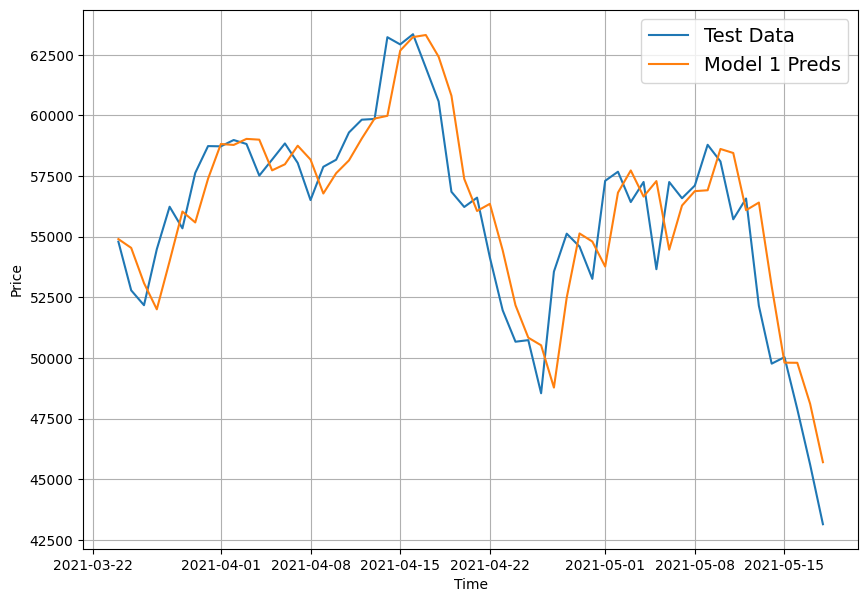

In [50]:
offset = 500
plt.figure(figsize=(10, 7))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, ], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_1_preds, format="-", start=offset, end=None, label="Model 1 Preds")

> As we have surpassed our baseline. Now its time to improve our model and for improving our model we will be doing more experiments

In [51]:
HORIZON = 1
WINDOW = 30
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
 200.70166 180.355   175.03166 177.6965  187.15983 192.75666 197.4
 196.02499 198.04883] -> Label: [198.93233]


In [52]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [53]:
np.array_equal(np.squeeze(train_labels[:-HORIZON]).shape, len(y_train[WINDOW-5:]))

False

In [54]:
np.squeeze(train_labels[:-HORIZON]).shape, len(y_train[WINDOW-5:])

((2204,), 2204)

## Model 2

In [55]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="Model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 5790.7715 - mae: 5790.7715 - mse: 82275616.0000

18/18 [==============================] - 3s 103ms/step - loss: 2076.6086 - mae: 2076.6086 - mse: 17464858.0000 - val_loss: 4075.2046 - val_mae: 4075.2046 - val_mse: 35771564.0000
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 523.8393 - mae: 523.8393 - mse: 1066455.8750

18/18 [==============================] - 1s 47ms/step - loss: 501.0943 - mae: 501.0943 - mse: 997405.9375 - val_loss: 2331.1165 - val_mae: 2331.1165 - val_mse: 14256864.0000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 322.1861 - mae: 322.1861 - mse: 485449.8125

18/18 [==============================] - 1s 61ms/step - loss: 314.5515 - mae: 314.5515 - mse: 466495.9375 - val_loss: 1412.9619 - val_mae: 1412.9619 - val_mse: 6148795.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 223.5213 - mae: 223.5213 - mse: 298533.9375

18/18 [==============================] - 1s 34ms/step - loss: 241.5326 - mae: 241.5326 - mse: 282482.5000 - val_loss: 1342.3367 - val_mae: 1342.3367 - val_mse: 5179122.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 177.2375 - mae: 177.2375 - mse: 129842.1406

18/18 [==============================] - 1s 33ms/step - loss: 208.2663 - mae: 208.2663 - mse: 224611.6094 - val_loss: 1133.0902 - val_mae: 1133.0902 - val_mse: 4193822.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 219.3864 - mae: 219.3864 - mse: 229027.7812 - val_loss: 1416.0752 - val_mae: 1416.0752 - val_mse: 6185902.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 248.6038 - mae: 248.6038 - mse: 301032.8438

18/18 [==============================] - 1s 36ms/step - loss: 204.9263 - mae: 204.9263 - mse: 206769.0000 - val_loss: 1059.8162 - val_mae: 1059.8162 - val_mse: 3904372.0000
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 184.6803 - mae: 184.6803 - mse: 180057.7031 - val_loss: 1082.4829 - val_mae: 1082.4829 - val_mse: 3609779.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6139 - mae: 187.6139 - mse: 224429.1094

18/18 [==============================] - 1s 33ms/step - loss: 176.8483 - mae: 176.8483 - mse: 168066.2188 - val_loss: 997.6086 - val_mae: 997.6086 - val_mse: 3450710.5000
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 175.1841 - mae: 175.1841 - mse: 160243.1562 - val_loss: 1047.9873 - val_mae: 1047.9873 - val_mse: 3627920.7500
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 168.4973 - mae: 168.4973 - mse: 154009.1562 - val_loss: 1503.1350 - val_mae: 1503.1350 - val_mse: 5485986.5000
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 192.4429 - mae: 192.4429 - mse: 177051.5312 - val_loss: 1017.1957 - val_mae: 1017.1957 - val_mse: 3086874.0000
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 160.3206 - mae: 160.3206 - mse: 137092.6094 - val_loss: 1238.2820 - val_mae: 1238.2820 - val_mse: 4578594.5000
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 172.8522 - mae: 172

18/18 [==============================] - 1s 35ms/step - loss: 172.8522 - mae: 172.8522 - mse: 152638.7188 - val_loss: 897.1960 - val_mae: 897.1960 - val_mse: 2753367.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 214.9311 - mae: 214.9311 - mse: 213684.7500

18/18 [==============================] - 1s 33ms/step - loss: 165.9336 - mae: 165.9336 - mse: 138694.5312 - val_loss: 868.2032 - val_mae: 868.2032 - val_mse: 2546016.5000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 165.4689 - mae: 165.4689 - mse: 134210.5469 - val_loss: 951.4561 - val_mae: 951.4561 - val_mse: 2706934.7500
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 159.0502 - mae: 159.0502 - mse: 128902.9688 - val_loss: 1601.0160 - val_mae: 1601.0160 - val_mse: 5878352.5000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 218.2821 - mae: 218.2821 - mse: 205900.1094 - val_loss: 1698.4015 - val_mae: 1698.4015 - val_mse: 6465631.5000
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 211.9478 - mae: 211.9478 - mse: 184073.5156 - val_loss: 1694.5677 - val_mae: 1694.5677 - val_mse: 7255416.0000
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 174.1444 - mae: 1

18/18 [==============================] - 1s 35ms/step - loss: 184.0847 - mae: 184.0847 - mse: 156634.0938 - val_loss: 806.6815 - val_mae: 806.6815 - val_mse: 2145047.2500
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 145.2111 - mae: 145.2111 - mse: 109070.8203 - val_loss: 952.8936 - val_mae: 952.8936 - val_mse: 2598990.5000
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 173.8292 - mae: 173.8292 - mse: 138247.6094 - val_loss: 1755.6835 - val_mae: 1755.6835 - val_mse: 6683143.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 314.0016 - mae: 314.0016 - mse: 295382.6562

18/18 [==============================] - 1s 32ms/step - loss: 201.0442 - mae: 201.0442 - mse: 167701.3750 - val_loss: 794.8624 - val_mae: 794.8624 - val_mse: 2068843.6250
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 175.6285 - mae: 175.6285 - mse: 141290.7812 - val_loss: 920.0331 - val_mae: 920.0331 - val_mse: 2461902.2500
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 151.7133 - mae: 151.7133 - mse: 116373.7578 - val_loss: 967.2729 - val_mae: 967.2729 - val_mse: 2883287.2500
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 159.9428 - mae: 159.9428 - mse: 122562.6719 - val_loss: 837.0164 - val_mae: 837.0164 - val_mse: 2288303.2500
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 137.0593 - mae: 137.0593 - mse: 102301.9453 - val_loss: 867.8131 - val_mae: 867.8131 - val_mse: 2416186.5000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 141.6084 - mae: 141.608

18/18 [==============================] - 1s 34ms/step - loss: 179.2502 - mae: 179.2502 - mse: 145782.6250 - val_loss: 753.4990 - val_mae: 753.4990 - val_mse: 1898884.0000
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 154.2357 - mae: 154.2357 - mse: 114459.0312 - val_loss: 907.4752 - val_mae: 907.4752 - val_mse: 2364539.5000
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 138.6340 - mae: 138.6340 - mse: 103049.0547 - val_loss: 878.7957 - val_mae: 878.7957 - val_mse: 2419445.0000
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 140.3678 - mae: 140.3678 - mse: 99546.2500 

18/18 [==============================] - 1s 36ms/step - loss: 138.6842 - mae: 138.6842 - mse: 100854.1172 - val_loss: 739.9323 - val_mae: 739.9323 - val_mse: 1805782.7500
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 133.4237 - mae: 133.4237 - mse: 96747.1875 - val_loss: 745.8643 - val_mae: 745.8643 - val_mse: 1814985.1250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 142.3047 - mae: 142.3047 - mse: 103321.4609 - val_loss: 1141.7012 - val_mae: 1141.7012 - val_mse: 3270373.0000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 151.5449 - mae: 151.5449 - mse: 106093.5391 - val_loss: 800.6804 - val_mae: 800.6804 - val_mse: 1976515.0000
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 136.9278 - mae: 136.9278 - mse: 97108.6094 - val_loss: 842.4896 - val_mae: 842.4896 - val_mse: 2249988.7500
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 134.1491 - mae: 134.149

18/18 [==============================] - 1s 33ms/step - loss: 132.1362 - mae: 132.1362 - mse: 92903.5938 - val_loss: 733.6022 - val_mae: 733.6022 - val_mse: 1761408.7500
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 134.2328 - mae: 134.2328 - mse: 93706.0625 - val_loss: 748.2657 - val_mae: 748.2657 - val_mse: 1848067.6250
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3662 - mae: 119.3662 - mse: 58860.5703

18/18 [==============================] - 1s 34ms/step - loss: 129.7844 - mae: 129.7844 - mse: 91075.9453 - val_loss: 732.7990 - val_mae: 732.7990 - val_mse: 1789697.1250
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 130.1505 - mae: 130.1505 - mse: 91904.0234 - val_loss: 909.8947 - val_mae: 909.8947 - val_mse: 2471224.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 171.0556 - mae: 171.0556 - mse: 132177.7656 - val_loss: 754.6538 - val_mae: 754.6538 - val_mse: 1868346.7500
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 140.5673 - mae: 140.5673 - mse: 104545.4219 - val_loss: 1155.2811 - val_mae: 1155.2811 - val_mse: 3277741.0000
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 140.3404 - mae: 140.3404 - mse: 101215.0938 - val_loss: 936.1210 - val_mae: 936.1210 - val_mse: 2567552.5000
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 138.5894 - mae: 138.589

18/18 [==============================] - 1s 46ms/step - loss: 127.2375 - mae: 127.2375 - mse: 88484.0391 - val_loss: 707.7360 - val_mae: 707.7360 - val_mse: 1668682.6250
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 128.9760 - mae: 128.9760 - mse: 88483.6719 - val_loss: 865.7802 - val_mae: 865.7802 - val_mse: 2257256.0000
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 179.9978 - mae: 179.9978 - mse: 131141.3438 - val_loss: 858.8353 - val_mae: 858.8353 - val_mse: 2199116.7500
Epoch 51/100
13/18 [====================>.........] - ETA: 0s - loss: 140.5167 - mae: 140.5167 - mse: 92816.5000

18/18 [==============================] - 1s 49ms/step - loss: 142.7682 - mae: 142.7682 - mse: 98739.6875 - val_loss: 687.5189 - val_mae: 687.5189 - val_mse: 1573781.6250
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 130.8091 - mae: 130.8091 - mse: 95504.3359 - val_loss: 688.1290 - val_mae: 688.1290 - val_mse: 1585447.2500
Epoch 53/100
13/18 [====================>.........] - ETA: 0s - loss: 124.5910 - mae: 124.5910 - mse: 81945.1172

18/18 [==============================] - 1s 49ms/step - loss: 127.0645 - mae: 127.0645 - mse: 88562.9062 - val_loss: 682.2591 - val_mae: 682.2591 - val_mse: 1553135.2500
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 124.9915 - mae: 124.9915 - mse: 84137.6406 - val_loss: 725.8019 - val_mae: 725.8019 - val_mse: 1684715.7500
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 122.3633 - mae: 122.3633 - mse: 83917.6016 - val_loss: 730.2712 - val_mae: 730.2712 - val_mse: 1721784.6250
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 136.8338 - mae: 136.8338 - mse: 93956.8047 - val_loss: 730.5832 - val_mae: 730.5832 - val_mse: 1698439.2500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 136.8343 - mae: 136.8343 - mse: 93629.9688 - val_loss: 933.1474 - val_mae: 933.1474 - val_mse: 2356810.7500
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 151.9423 - mae: 151.9423 - m

18/18 [==============================] - 1s 33ms/step - loss: 128.1060 - mae: 128.1060 - mse: 89065.1172 - val_loss: 682.0282 - val_mae: 682.0282 - val_mse: 1540307.7500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6099 - mae: 132.6099 - mse: 118275.2812

18/18 [==============================] - 1s 51ms/step - loss: 119.8506 - mae: 119.8506 - mse: 81300.3359 - val_loss: 666.5556 - val_mae: 666.5556 - val_mse: 1475122.7500
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8716 - mae: 119.8716 - mse: 81128.1562 - val_loss: 750.0047 - val_mae: 750.0047 - val_mse: 1714138.6250
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1422 - mae: 123.1422 - mse: 82204.1016 - val_loss: 742.5771 - val_mae: 742.5771 - val_mse: 1689240.5000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 131.6155 - mae: 131.6155 - mse: 90128.7891 - val_loss: 1290.1014 - val_mae: 1290.1014 - val_mse: 3796231.7500
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 159.1459 - mae: 159.1459 - mse: 116411.5781 - val_loss: 806.9329 - val_mae: 806.9329 - val_mse: 1888083.8750
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 128.5532 - mae: 128.5532 

18/18 [==============================] - 1s 34ms/step - loss: 121.3777 - mae: 121.3777 - mse: 82874.6719 - val_loss: 648.9266 - val_mae: 648.9266 - val_mse: 1434092.0000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3632 - mae: 124.3632 - mse: 81957.7422 - val_loss: 859.9902 - val_mae: 859.9902 - val_mse: 2062630.2500
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 143.1698 - mae: 143.1698 - mse: 97044.0156 - val_loss: 1125.5360 - val_mae: 1125.5360 - val_mse: 3307634.5000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 156.4074 - mae: 156.4074 - mse: 109687.1484 - val_loss: 1204.4052 - val_mae: 1204.4052 - val_mse: 3382222.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 182.4149 - mae: 182.4149 - mse: 132206.4688 - val_loss: 796.2612 - val_mae: 796.2612 - val_mse: 1915745.2500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 182.8237 - mae: 182.82

18/18 [==============================] - 1s 35ms/step - loss: 136.4606 - mae: 136.4606 - mse: 90068.0000 - val_loss: 645.9326 - val_mae: 645.9326 - val_mse: 1419475.7500
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8314 - mae: 119.8314 - mse: 81490.4766 - val_loss: 688.5355 - val_mae: 688.5355 - val_mse: 1530659.5000
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 125.6554 - mae: 125.6554 - mse: 84699.6562 - val_loss: 739.3764 - val_mae: 739.3764 - val_mse: 1668808.7500
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2340 - mae: 126.2340 - mse: 67351.6172

18/18 [==============================] - 1s 32ms/step - loss: 128.1328 - mae: 128.1328 - mse: 86171.8750 - val_loss: 644.5656 - val_mae: 644.5656 - val_mse: 1416410.3750
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3291 - mae: 120.3291 - mse: 80714.1328 - val_loss: 881.2824 - val_mae: 881.2824 - val_mse: 2120399.0000
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 178.0841 - mae: 178.0841 - mse: 131427.1875

18/18 [==============================] - 1s 34ms/step - loss: 153.0179 - mae: 153.0179 - mse: 102292.3906 - val_loss: 640.6290 - val_mae: 640.6290 - val_mse: 1388381.1250
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 140.6442 - mae: 140.6442 - mse: 93582.6016 - val_loss: 643.1945 - val_mae: 643.1945 - val_mse: 1402629.6250
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 152.2914 - mae: 152.2914 - mse: 103434.3047 - val_loss: 1301.0848 - val_mae: 1301.0848 - val_mse: 3817333.7500
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 154.1778 - mae: 154.1778 - mse: 108683.1172 - val_loss: 797.7776 - val_mae: 797.7776 - val_mse: 1836880.2500
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 126.3598 - mae: 126.3598 - mse: 83267.9219 - val_loss: 659.0831 - val_mae: 659.0831 - val_mse: 1443978.3750
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 129.6874 - mae: 129.687

18/18 [==============================] - 1s 34ms/step - loss: 129.7378 - mae: 129.7378 - mse: 88842.6016 - val_loss: 638.4391 - val_mae: 638.4391 - val_mse: 1377507.8750
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 127.6499 - mae: 127.6499 - mse: 86349.3828 - val_loss: 665.6367 - val_mae: 665.6367 - val_mse: 1451640.3750
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 102.5112 - mae: 102.5112 - mse: 48990.1211

18/18 [==============================] - 1s 35ms/step - loss: 127.4606 - mae: 127.4606 - mse: 87473.3750 - val_loss: 633.7225 - val_mae: 633.7225 - val_mse: 1352354.0000
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9281 - mae: 114.9281 - mse: 75699.4375 - val_loss: 704.3633 - val_mae: 704.3633 - val_mse: 1573337.5000
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4198 - mae: 125.4198 - mse: 82638.6250 - val_loss: 727.4387 - val_mae: 727.4387 - val_mse: 1655316.1250


In [56]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 727.4387 - mae: 727.4387 - mse: 1655316.1250


[727.4386596679688, 727.4386596679688, 1655316.125]

In [57]:
model_2 = tf.keras.models.load_model("model_experiments/Model_2")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 633.7225 - mae: 633.7225 - mse: 1352354.3750


[633.7225341796875, 633.7225341796875, 1352354.375]

In [58]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [59]:
model_2_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_2_preds)
model_2_results

{'MAE': 633.72253,
 'MSE': 1352354.2,
 'RMSE': 1162.9077,
 'MAPE': 2.8757265,
 'MASE': 1.1077533}

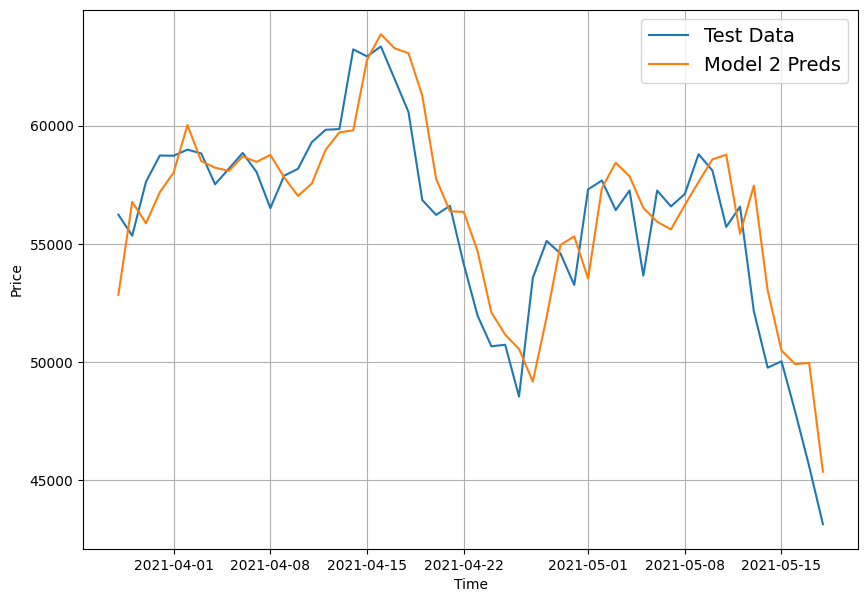

In [60]:
offset = 500
plt.figure(figsize=(10, 7))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_2_preds, format="-", start=offset, end=None, label="Model 2 Preds")

> Check for autoCorrelation to understand why we observe offset

## Model - 3: Same as model#1 but with horizon of 7 and windows of 30

In [61]:
HORIZON = 7
WINDOW = 30
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188

In [62]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [63]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="Model_3")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100, 
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 1111.6731 - mae: 1111.6731 - mse: 5893208.5000  

18/18 [==============================] - 3s 108ms/step - loss: 975.7328 - mae: 975.7328 - mse: 4756447.0000 - val_loss: 2877.1716 - val_mae: 2877.1716 - val_mse: 21666230.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 443.1945 - mae: 443.1945 - mse: 870862.7500

18/18 [==============================] - 1s 37ms/step - loss: 440.5659 - mae: 440.5659 - mse: 891536.7500 - val_loss: 1928.0295 - val_mae: 1928.0295 - val_mse: 11185551.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 342.3712 - mae: 342.3712 - mse: 423566.1562

18/18 [==============================] - 1s 35ms/step - loss: 365.1838 - mae: 365.1838 - mse: 642119.1875 - val_loss: 1911.2677 - val_mae: 1911.2677 - val_mse: 10739647.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 395.9420 - mae: 395.9420 - mse: 740636.1250

18/18 [==============================] - 1s 33ms/step - loss: 332.2624 - mae: 332.2624 - mse: 535491.7500 - val_loss: 1717.9683 - val_mae: 1717.9683 - val_mse: 8981625.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 379.4365 - mae: 379.4365 - mse: 633662.5000

18/18 [==============================] - 1s 35ms/step - loss: 313.7617 - mae: 313.7617 - mse: 475494.2812 - val_loss: 1717.7461 - val_mae: 1717.7461 - val_mse: 8693594.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 300.5564 - mae: 300.5564 - mse: 441113.4688 - val_loss: 1751.2673 - val_mae: 1751.2673 - val_mse: 9054414.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 268.2499 - mae: 268.2499 - mse: 340483.6875

18/18 [==============================] - 1s 32ms/step - loss: 291.0544 - mae: 291.0544 - mse: 416783.1562 - val_loss: 1658.1066 - val_mae: 1658.1066 - val_mse: 8183052.5000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 282.6819 - mae: 282.6819 - mse: 395218.7500

18/18 [==============================] - 1s 34ms/step - loss: 282.7026 - mae: 282.7026 - mse: 395070.9688 - val_loss: 1530.8431 - val_mae: 1530.8431 - val_mse: 7414082.0000
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 277.5805 - mae: 277.5805 - mse: 384453.4062 - val_loss: 1664.2999 - val_mae: 1664.2999 - val_mse: 8157630.0000
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 283.7584 - mae: 283.7584 - mse: 385542.8438 - val_loss: 1606.1836 - val_mae: 1606.1836 - val_mse: 7805848.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 282.9853 - mae: 282.9853 - mse: 413712.2500

18/18 [==============================] - 1s 47ms/step - loss: 270.1700 - mae: 270.1700 - mse: 364000.6875 - val_loss: 1497.3901 - val_mae: 1497.3901 - val_mse: 7136502.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 267.0201 - mae: 267.0201 - mse: 359714.5625 - val_loss: 1515.1412 - val_mae: 1515.1412 - val_mse: 7152489.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 236.6158 - mae: 236.6158 - mse: 337934.8438

18/18 [==============================] - 1s 34ms/step - loss: 265.5753 - mae: 265.5753 - mse: 357129.5938 - val_loss: 1478.5442 - val_mae: 1478.5442 - val_mse: 7108476.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 254.7319 - mae: 254.7319 - mse: 281391.5625

18/18 [==============================] - 1s 35ms/step - loss: 271.9651 - mae: 271.9651 - mse: 360228.6875 - val_loss: 1438.2748 - val_mae: 1438.2748 - val_mse: 6745547.0000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 263.8534 - mae: 263.8534 - mse: 346019.0625 - val_loss: 1619.7783 - val_mae: 1619.7783 - val_mse: 7562082.0000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 264.9757 - mae: 264.9757 - mse: 347172.4062 - val_loss: 1516.7701 - val_mae: 1516.7701 - val_mse: 7049222.5000
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 255.5363 - mae: 255.5363 - mse: 333907.6875 - val_loss: 1579.9410 - val_mae: 1579.9410 - val_mse: 7517930.0000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 259.5702 - mae: 259.5702 - mse: 337311.9062 - val_loss: 1715.8208 - val_mae: 1715.8208 - val_mse: 8380534.0000
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 259.0547 - ma

18/18 [==============================] - 1s 33ms/step - loss: 251.1567 - mae: 251.1567 - mse: 321650.6875 - val_loss: 1383.1101 - val_mae: 1383.1101 - val_mse: 6375672.0000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 249.4724 - mae: 249.4724 - mse: 319703.9062 - val_loss: 1412.5275 - val_mae: 1412.5275 - val_mse: 6611388.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 307.3248 - mae: 307.3248 - mse: 473738.5625

18/18 [==============================] - 1s 33ms/step - loss: 273.5834 - mae: 273.5834 - mse: 358579.9062 - val_loss: 1374.4242 - val_mae: 1374.4242 - val_mse: 6246591.5000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 246.5108 - mae: 246.5108 - mse: 311594.9062 - val_loss: 1446.2883 - val_mae: 1446.2883 - val_mse: 6599047.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 242.8190 - mae: 242.8190 - mse: 307288.5625 - val_loss: 1441.3853 - val_mae: 1441.3853 - val_mse: 6596446.5000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 241.9226 - mae: 241.9226 - mse: 308418.5312 - val_loss: 1417.7566 - val_mae: 1417.7566 - val_mse: 6362220.5000
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 240.6291 - mae: 240.6291 - mse: 302227.6562 - val_loss: 1377.0585 - val_mae: 1377.0585 - val_mse: 6214753.0000
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 239.5193 - ma

18/18 [==============================] - 1s 33ms/step - loss: 243.3798 - mae: 243.3798 - mse: 311111.9375 - val_loss: 1372.2844 - val_mae: 1372.2844 - val_mse: 6220340.5000
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5761 - mae: 201.5761 - mse: 226648.5469

18/18 [==============================] - 1s 37ms/step - loss: 239.5112 - mae: 239.5112 - mse: 297125.5312 - val_loss: 1342.5507 - val_mae: 1342.5507 - val_mse: 5958457.0000
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 239.2122 - mae: 239.2122 - mse: 298890.5000

18/18 [==============================] - 1s 40ms/step - loss: 239.3579 - mae: 239.3579 - mse: 298909.6875 - val_loss: 1336.3995 - val_mae: 1336.3995 - val_mse: 5971262.5000
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 237.0208 - mae: 237.0208 - mse: 292939.6562

18/18 [==============================] - 1s 46ms/step - loss: 237.1429 - mae: 237.1429 - mse: 296254.5625 - val_loss: 1331.8044 - val_mae: 1331.8044 - val_mse: 5943404.5000
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 237.3515 - mae: 237.3515 - mse: 295282.2500 - val_loss: 1413.7024 - val_mae: 1413.7024 - val_mse: 6392488.0000
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 242.4933 - mae: 242.4933 - mse: 301171.7500 - val_loss: 1387.3228 - val_mae: 1387.3228 - val_mse: 6308904.0000
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 238.4541 - mae: 238.4541 - mse: 298333.5000 - val_loss: 1416.9646 - val_mae: 1416.9646 - val_mse: 6675170.0000
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 251.3930 - mae: 251.3930 - mse: 315899.1875

18/18 [==============================] - 1s 56ms/step - loss: 252.9868 - mae: 252.9868 - mse: 319093.4688 - val_loss: 1323.4192 - val_mae: 1323.4192 - val_mse: 5971257.0000
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 236.6633 - mae: 236.6633 - mse: 291946.6562 - val_loss: 1362.6189 - val_mae: 1362.6189 - val_mse: 6134321.0000
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 234.8285 - mae: 234.8285 - mse: 289889.5000 - val_loss: 1389.6593 - val_mae: 1389.6593 - val_mse: 6214622.5000
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 233.1019 - mae: 233.1019 - mse: 288829.9062 - val_loss: 1454.7156 - val_mae: 1454.7156 - val_mse: 6587429.0000
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 236.8616 - mae: 236.8616 - mse: 290702.5938 - val_loss: 1449.4860 - val_mae: 1449.4860 - val_mse: 6548662.5000
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 243.7125 - ma

18/18 [==============================] - 1s 47ms/step - loss: 230.9626 - mae: 230.9626 - mse: 283633.3750 - val_loss: 1311.5143 - val_mae: 1311.5143 - val_mse: 5861412.0000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 234.0107 - mae: 234.0107 - mse: 289072.7812 - val_loss: 1318.8838 - val_mae: 1318.8838 - val_mse: 5885655.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 230.7317 - mae: 230.7317 - mse: 285607.1875 - val_loss: 1520.4346 - val_mae: 1520.4346 - val_mse: 6946169.5000
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 251.4718 - mae: 251.4718 - mse: 351510.0625

18/18 [==============================] - 1s 37ms/step - loss: 235.5449 - mae: 235.5449 - mse: 291035.1250 - val_loss: 1299.2605 - val_mae: 1299.2605 - val_mse: 5746519.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 231.1494 - mae: 231.1494 - mse: 284379.9062 - val_loss: 1339.3961 - val_mae: 1339.3961 - val_mse: 5917237.0000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 231.3614 - mae: 231.3614 - mse: 283788.5000 - val_loss: 1332.5854 - val_mae: 1332.5854 - val_mse: 5938441.0000
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 247.1299 - mae: 247.1299 - mse: 301311.9688 - val_loss: 1467.7765 - val_mae: 1467.7765 - val_mse: 7148455.0000
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 237.6944 - mae: 237.6944 - mse: 292428.9375 - val_loss: 1311.3231 - val_mae: 1311.3231 - val_mse: 5817174.5000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 231.3161 - ma

18/18 [==============================] - 1s 35ms/step - loss: 234.1931 - mae: 234.1931 - mse: 283046.1562 - val_loss: 1293.3252 - val_mae: 1293.3252 - val_mse: 5791134.5000
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 293.0858 - mae: 293.0858 - mse: 333173.6875

18/18 [==============================] - 1s 35ms/step - loss: 227.1535 - mae: 227.1535 - mse: 272804.3125 - val_loss: 1289.6915 - val_mae: 1289.6915 - val_mse: 5660540.0000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 228.7468 - mae: 228.7468 - mse: 278280.6562 - val_loss: 1314.3036 - val_mae: 1314.3036 - val_mse: 5768639.5000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 227.9795 - mae: 227.9795 - mse: 278576.6562 - val_loss: 1368.7172 - val_mae: 1368.7172 - val_mse: 6168358.5000
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 227.2140 - mae: 227.2140 - mse: 271863.6875 - val_loss: 1291.8950 - val_mae: 1291.8950 - val_mse: 5664691.5000
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 228.0421 - mae: 228.0421 - mse: 279527.1562 - val_loss: 1292.0153 - val_mae: 1292.0153 - val_mse: 5688201.0000
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 226.1909 - ma

18/18 [==============================] - 1s 35ms/step - loss: 227.8145 - mae: 227.8145 - mse: 275309.5938 - val_loss: 1267.8528 - val_mae: 1267.8528 - val_mse: 5565969.0000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 224.7121 - mae: 224.7121 - mse: 273555.5938 - val_loss: 1337.2083 - val_mae: 1337.2083 - val_mse: 5855057.0000
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 229.2384 - mae: 229.2384 - mse: 275096.5000 - val_loss: 1622.2494 - val_mae: 1622.2494 - val_mse: 7639268.5000
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 236.9064 - mae: 236.9064 - mse: 286210.0312 - val_loss: 1311.6633 - val_mae: 1311.6633 - val_mse: 5731429.5000
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 232.2991 - mae: 232.2991 - mse: 277319.9375 - val_loss: 1324.0801 - val_mae: 1324.0801 - val_mse: 6030799.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 227.1959 - ma

18/18 [==============================] - 1s 36ms/step - loss: 228.1320 - mae: 228.1320 - mse: 272912.3125 - val_loss: 1265.5980 - val_mae: 1265.5980 - val_mse: 5616831.5000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 223.2679 - mae: 223.2679 - mse: 266787.7188 - val_loss: 1291.2659 - val_mae: 1291.2659 - val_mse: 5693567.0000
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 223.8568 - mae: 223.8568 - mse: 268397.7188 - val_loss: 1395.7209 - val_mae: 1395.7209 - val_mse: 6140858.5000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 223.5038 - mae: 223.5038 - mse: 265845.9062 - val_loss: 1378.3958 - val_mae: 1378.3958 - val_mse: 6143085.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 227.1263 - mae: 227.1263 - mse: 276077.0625 - val_loss: 1309.2310 - val_mae: 1309.2310 - val_mse: 5823716.0000
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 225.0401 - ma

18/18 [==============================] - 1s 36ms/step - loss: 223.8356 - mae: 223.8356 - mse: 270017.8750 - val_loss: 1265.4150 - val_mae: 1265.4150 - val_mse: 5635358.0000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 220.4698 - mae: 220.4698 - mse: 265486.8438 - val_loss: 1277.5654 - val_mae: 1277.5654 - val_mse: 5607176.5000
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 219.6766 - mae: 219.6766 - mse: 262889.5625 - val_loss: 1299.5000 - val_mae: 1299.5000 - val_mse: 5776716.5000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 230.6373 - mae: 230.6373 - mse: 271715.0938 - val_loss: 1383.4119 - val_mae: 1383.4119 - val_mse: 6125283.5000
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 228.4347 - mae: 228.4347 - mse: 271279.0312 - val_loss: 1539.5524 - val_mae: 1539.5524 - val_mse: 7121700.0000
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 227.5671 - ma

In [64]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1322.4574 - mae: 1322.4574 - mse: 5882375.5000


[1322.4573974609375, 1322.4573974609375, 5882375.5]

In [65]:
Model_3 = tf.keras.models.load_model("model_experiments/Model_3")
Model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1265.4150 - mae: 1265.4150 - mse: 5635358.0000


[1265.4150390625, 1265.4150390625, 5635358.0]

In [66]:
model_3_preds = make_preds(Model_3, test_windows)
model_3_preds

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9443.803,  9547.185,  9615.83 , ...,  9565.195,  9409.771,
         9502.698],
       [ 9136.866,  9253.302,  9206.123, ...,  9496.665,  9283.076,
         9206.983],
       [ 8878.96 ,  9075.697,  9053.525, ...,  9623.744,  9255.61 ,
         9179.784],
       ...,
       [58863.918, 58349.33 , 59045.613, ..., 58767.066, 59281.54 ,
        59139.176],
       [59902.855, 59007.582, 59652.47 , ..., 60417.477, 60008.2  ,
        59420.855],
       [57920.266, 57516.086, 57535.25 , ..., 58863.89 , 58354.746,
        57805.71 ]], dtype=float32)>

In [67]:
model_3_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_3_preds)
model_3_results

{'MAE': 1265.415,
 'MSE': 5635358.0,
 'RMSE': 2373.8909,
 'MAPE': 5.706675,
 'MASE': 2.251735}

> Actual plot

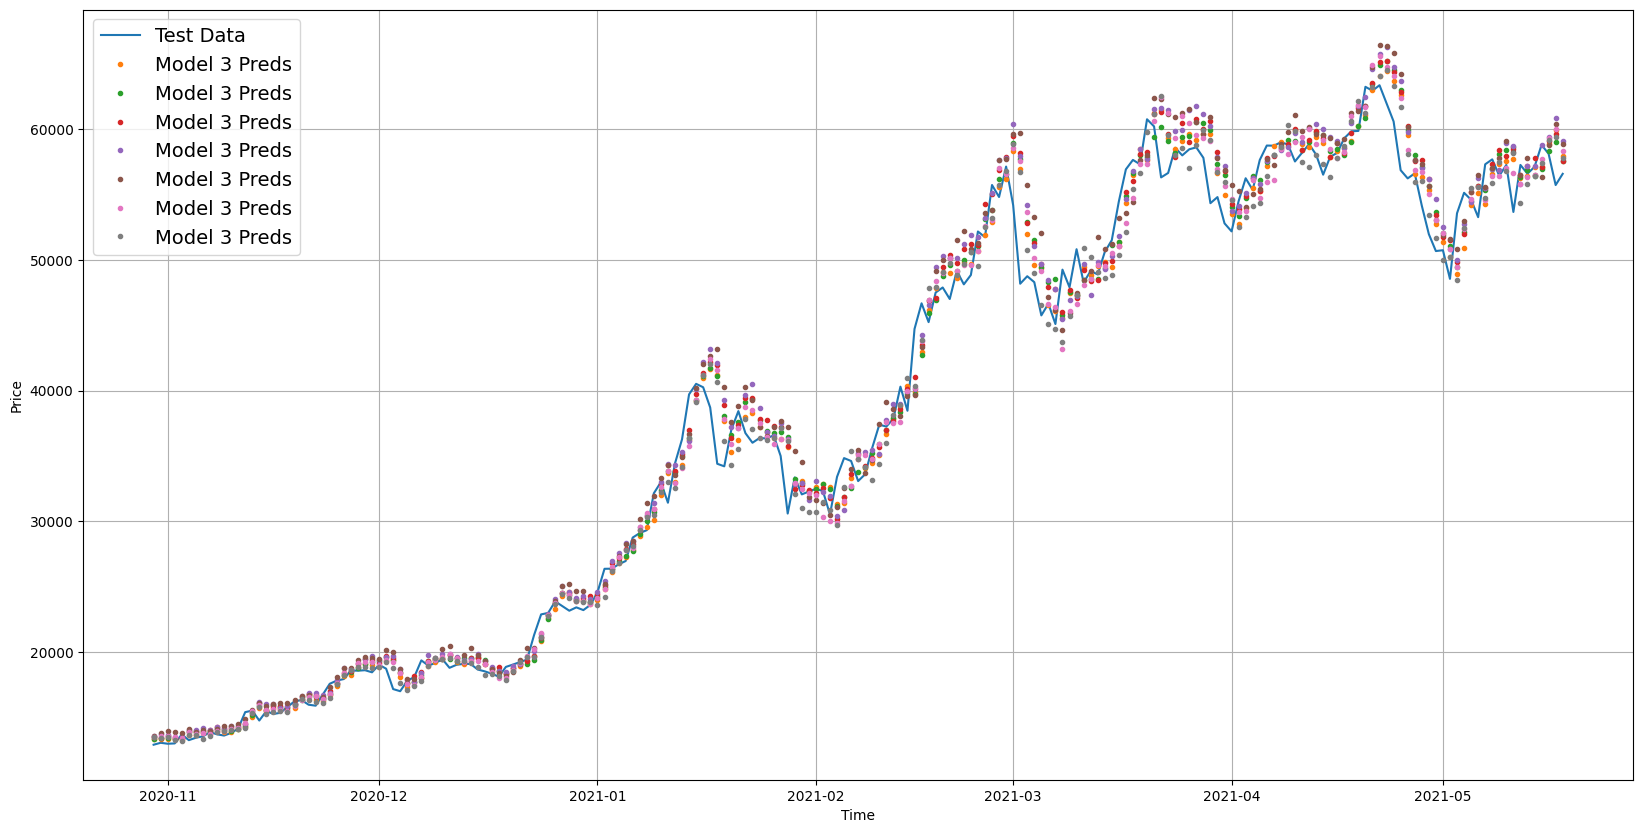

In [68]:
offset = 350
plt.figure(figsize=(20, 10))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_3_preds, start=offset, end=None, label="Model 3 Preds")

> For understanding purposes we have reduce the dimensionality of predicted values

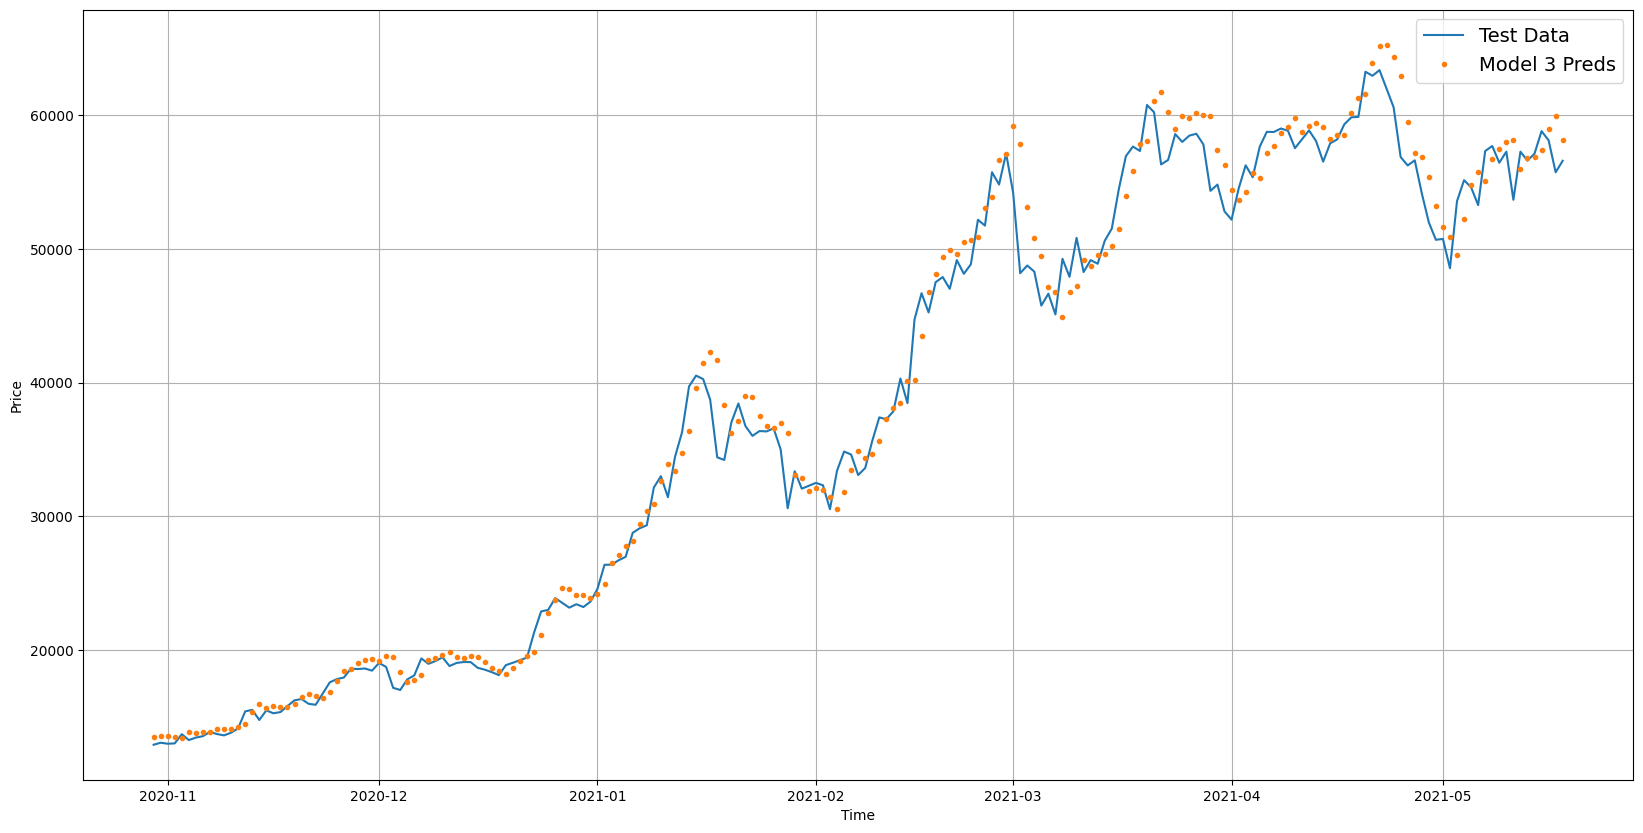

In [69]:
offset = 350
plt.figure(figsize=(20, 10))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=tf.reduce_mean(model_3_preds, axis=1), start=offset, end=None, label="Model 3 Preds")

### Comparing the all three models results

In [70]:
model_results = {'Naive':naive_result, 'Model1':model_1_results, 'Model2':model_2_results, 'Model3':model_3_results}

In [71]:
def make_pred_comparison(model_result, metric):
  X = []
  Y = []
  for i in model_results.items():
    x = X.append(i[0])
    y = Y.append(i[1][metric])

  plt.figure(figsize=(12, 6))
  sns.barplot(x=X, y=Y)
  plt.title(f"{metric} comparison of different models")
  plt.xlabel('Models Name')
  plt.ylabel(metric)
  plt.show()   

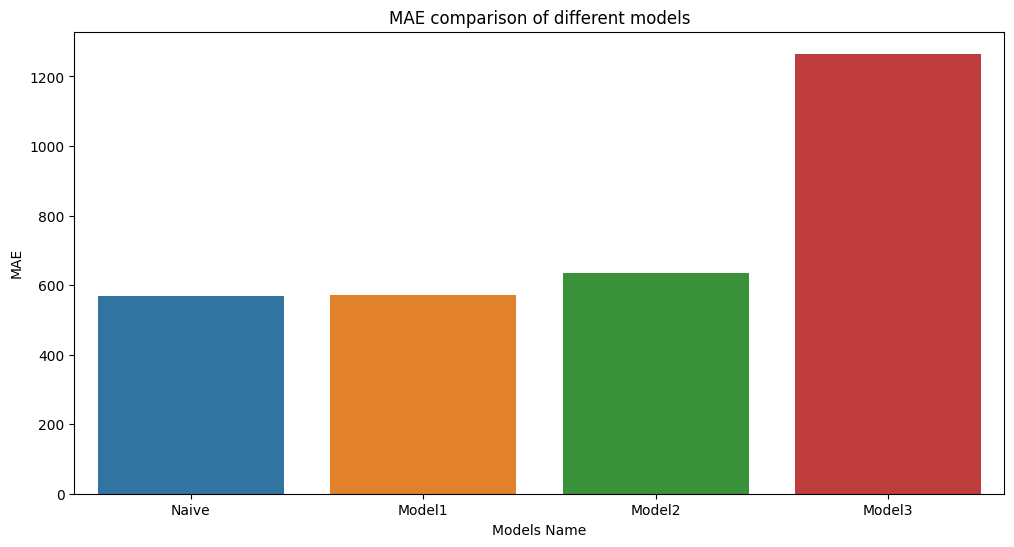

In [72]:
make_pred_comparison(model_results, 'MAE')

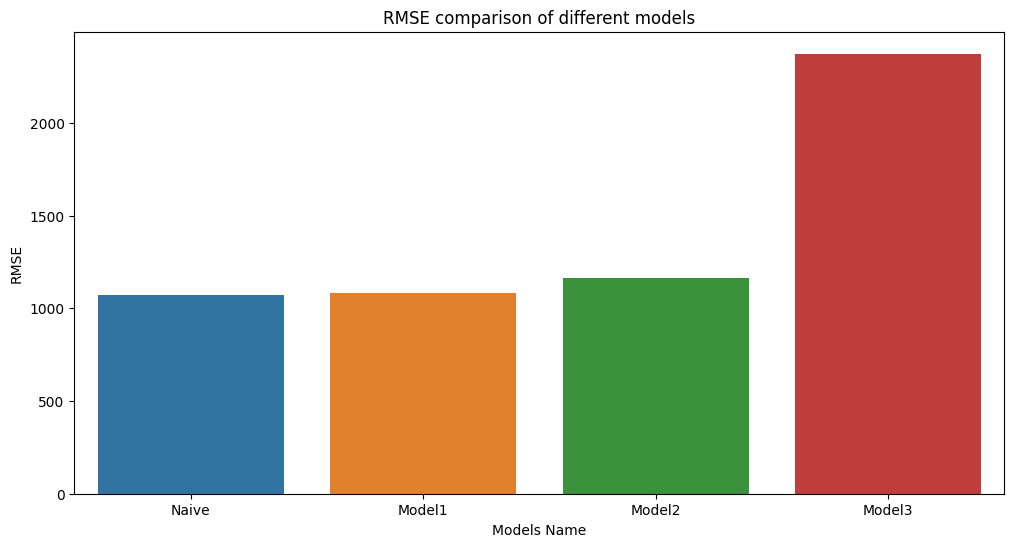

In [73]:
make_pred_comparison(model_results, 'RMSE')

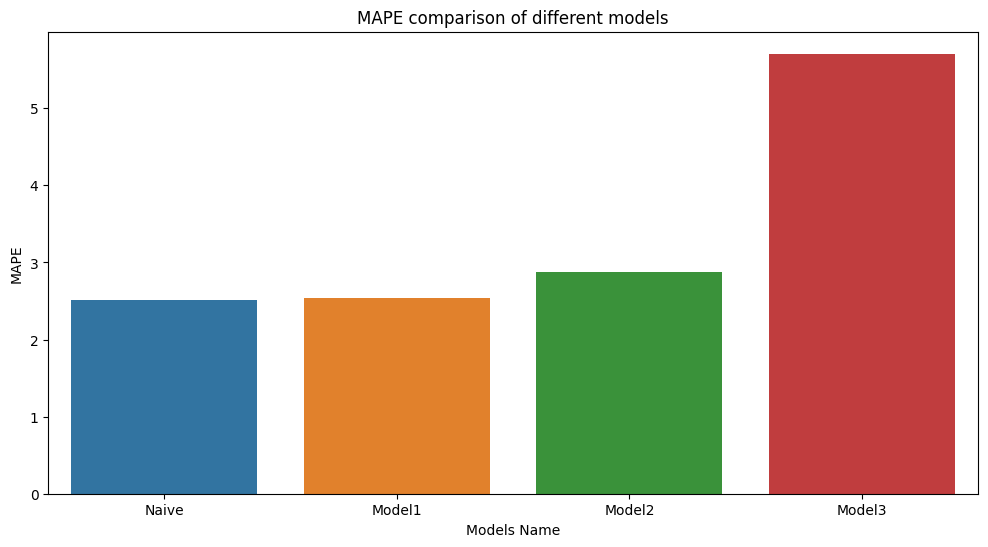

In [74]:
make_pred_comparison(model_results, 'MAPE')

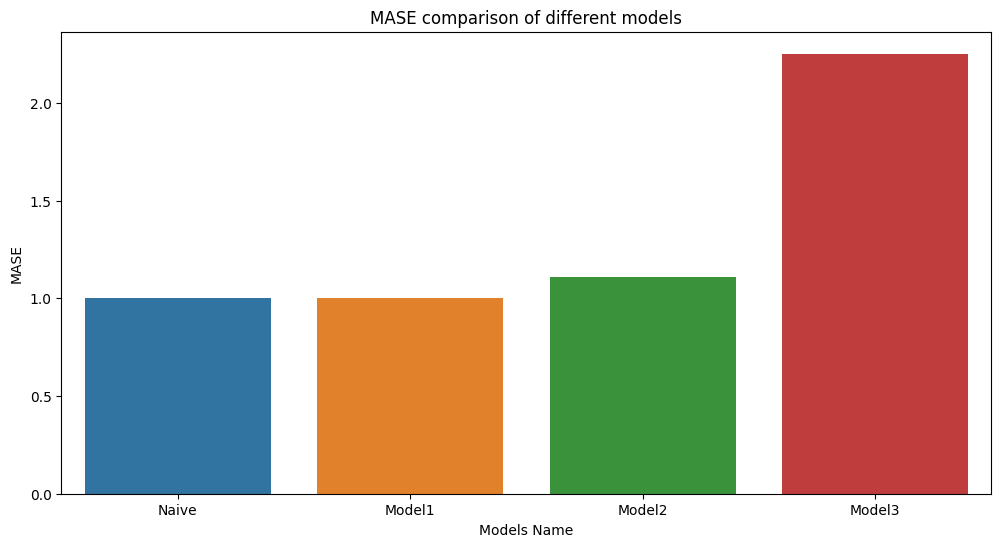

In [75]:
make_pred_comparison(model_results, 'MASE')

## Model 4: Conv1D

> Preparing dataset for conv1D model

Based on our previous result horizon = 1, and windows = 7 work best of all continuing with these parameters

For making the input layer of conv1D we need input shape in this format batch_size + (steps, input_ndim)

In [76]:
BATCH_SIZE = 128
HORIZON = 1 #steps
WINDOW = 7 #input_ndim

In [77]:
array = np.array(price)
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [78]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows),  len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [79]:
windows = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(windows).shape

TensorShape([7, 1])

In [80]:
len(train_windows), len(train_labels)

(2224, 2224)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name="Model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_4 = model_4.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1376.6747  

18/18 [==============================] - 7s 98ms/step - loss: 1350.1389 - val_loss: 991.9327
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 292.4866 - val_loss: 1491.9330
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 208.1671 - val_loss: 1009.4638
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 191.2757

18/18 [==============================] - 1s 63ms/step - loss: 182.3289 - val_loss: 984.4691
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 183.8066

18/18 [==============================] - 1s 60ms/step - loss: 175.8429 - val_loss: 981.4282
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 170.8095

18/18 [==============================] - 1s 62ms/step - loss: 173.9762 - val_loss: 974.0455
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 178.1037

18/18 [==============================] - 1s 44ms/step - loss: 173.5914 - val_loss: 947.2274
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 168.5534

18/18 [==============================] - 1s 44ms/step - loss: 168.5534 - val_loss: 942.3040
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 166.5408 - val_loss: 966.8233
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 164.0147

18/18 [==============================] - 1s 44ms/step - loss: 164.0147 - val_loss: 913.0120
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 161.6350

18/18 [==============================] - 1s 59ms/step - loss: 161.6350 - val_loss: 895.0085
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 160.5249 - val_loss: 936.2197
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 157.6124 - val_loss: 913.3761
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 151.8659

18/18 [==============================] - 1s 43ms/step - loss: 154.5043 - val_loss: 883.5715
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 156.1902

18/18 [==============================] - 1s 42ms/step - loss: 153.4356 - val_loss: 863.7203
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 151.6319

18/18 [==============================] - 1s 43ms/step - loss: 149.8806 - val_loss: 838.6488
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 148.6311 - val_loss: 839.0109
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 146.7355

18/18 [==============================] - 1s 43ms/step - loss: 146.7355 - val_loss: 829.6859
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 81.7264

18/18 [==============================] - 1s 43ms/step - loss: 144.3121 - val_loss: 821.9796
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 142.5846

18/18 [==============================] - 1s 43ms/step - loss: 142.5846 - val_loss: 803.3519
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 195.9870

18/18 [==============================] - 1s 43ms/step - loss: 142.7900 - val_loss: 775.8619
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 140.0996 - val_loss: 780.9511
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 137.3158 - val_loss: 780.3503
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 137.9393 - val_loss: 778.0427
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 149.5543

18/18 [==============================] - 1s 44ms/step - loss: 134.0848 - val_loss: 737.5996
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 138.7715

18/18 [==============================] - 1s 55ms/step - loss: 133.0267 - val_loss: 729.0936
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 134.7605

18/18 [==============================] - 1s 60ms/step - loss: 132.4832 - val_loss: 717.9380
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6281 - val_loss: 720.0624
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 129.7178

18/18 [==============================] - 1s 60ms/step - loss: 128.4291 - val_loss: 713.0678
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 130.6757 - val_loss: 786.1110
Epoch 31/100
18/18 [==============================] - 0s 9ms/step - loss: 136.3721 - val_loss: 752.4805
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 133.7592

18/18 [==============================] - 1s 68ms/step - loss: 131.7952 - val_loss: 683.4598
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 128.7890 - val_loss: 684.1888
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 124.7780

18/18 [==============================] - 1s 46ms/step - loss: 125.2765 - val_loss: 672.6807
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 114.6539

18/18 [==============================] - 1s 43ms/step - loss: 123.2255 - val_loss: 671.8839
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 127.6519 - val_loss: 693.5096
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 154.4456

18/18 [==============================] - 1s 43ms/step - loss: 122.7951 - val_loss: 657.0589
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 121.0840

18/18 [==============================] - 1s 42ms/step - loss: 121.0840 - val_loss: 651.0665
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 122.4545 - val_loss: 706.9074
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2335

18/18 [==============================] - 1s 44ms/step - loss: 120.8622 - val_loss: 645.1779
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 120.4204

18/18 [==============================] - 1s 42ms/step - loss: 120.4204 - val_loss: 639.2212
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 112.8549

18/18 [==============================] - 1s 42ms/step - loss: 122.2325 - val_loss: 636.0485
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8150 - val_loss: 650.4140
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5544 - val_loss: 654.8649
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 121.1982

18/18 [==============================] - 1s 43ms/step - loss: 120.7933 - val_loss: 627.5605
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2664 - val_loss: 632.4455
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 122.5285 - val_loss: 662.2256
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9534 - val_loss: 671.6340
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 171.6626

18/18 [==============================] - 1s 42ms/step - loss: 119.1190 - val_loss: 618.5203
Epoch 50/100
18/18 [==============================] - ETA: 0s - loss: 115.2700

18/18 [==============================] - 1s 43ms/step - loss: 115.2700 - val_loss: 614.5804
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6819 - val_loss: 625.8510
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 119.7607

18/18 [==============================] - 1s 41ms/step - loss: 117.2408 - val_loss: 610.3102
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 120.0869

18/18 [==============================] - 1s 64ms/step - loss: 118.1043 - val_loss: 608.0660
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 113.9147 - val_loss: 621.0705
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 123.1184

18/18 [==============================] - 2s 91ms/step - loss: 116.7558 - val_loss: 605.8625
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 114.5687 - val_loss: 797.0303
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 135.3640 - val_loss: 619.7029
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 119.0922 - val_loss: 631.4555
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 110.7797

18/18 [==============================] - 1s 56ms/step - loss: 112.9112 - val_loss: 603.9601
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2811 - val_loss: 608.4825
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8251 - val_loss: 617.9602
Epoch 62/100
16/18 [=========================>....] - ETA: 0s - loss: 115.2151

18/18 [==============================] - 1s 46ms/step - loss: 113.1651 - val_loss: 595.3179
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 113.5253

18/18 [==============================] - 1s 47ms/step - loss: 113.0899 - val_loss: 594.4833
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9880 - val_loss: 648.3741
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8956 - val_loss: 615.5270
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3672 - val_loss: 599.2552
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3569 - val_loss: 634.5565
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2994 - val_loss: 668.3652
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 124.8452 - val_loss: 681.2194
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 118.1311

18/18 [==============================] - 1s 47ms/step - loss: 119.3935 - val_loss: 589.5963
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2052 - val_loss: 612.9573
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 110.3731

18/18 [==============================] - 1s 46ms/step - loss: 112.0911 - val_loss: 586.0741
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8094 - val_loss: 617.9548
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2905 - val_loss: 589.2836
Epoch 75/100
15/18 [========================>.....] - ETA: 0s - loss: 111.1575

18/18 [==============================] - 1s 47ms/step - loss: 110.6778 - val_loss: 584.8254
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 110.6899

In [ ]:
model_4.summary()
# Our output shape is 3 dimension need to change to (None, 1)

In [ ]:
model_4.evaluate(test_windows, test_labels)

In [ ]:
Model_4 = tf.keras.models.load_model("model_experiments/Model_4_conv1D")

In [ ]:
Model_4.evaluate(test_windows, test_labels)

In [ ]:
model_4_preds = make_preds(Model_4, test_windows)
model_4_preds[:10]

In [ ]:
model_4_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_4_preds)
model_4_results

In [ ]:
offset = 300
plt.figure(figsize=(16, 8))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_4_preds, start=offset, end=None, label="Model 4 Preds")

## Model_5: LSTM

> We need to make a 3D input shape like [batch, timesteps, feature].

In [ ]:
BATCH_SIZE = 128
HORIZON = 1 #steps
WINDOW = 7 #input_ndim

In [ ]:
array = np.array(price)
full_windows, full_labels = make_windows(array, WINDOW, HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows),  len(train_labels), len(test_windows), len(test_labels)

In [92]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_5 = model_5.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 6s 233ms/step - loss: 2863.1270 - val_loss: 15353.9531
Epoch 2/100
18/18 [==============================] - 2s 120ms/step - loss: 1996.5270 - val_loss: 9336.0195
Epoch 3/100
18/18 [==============================] - 3s 163ms/step - loss: 944.5912 - val_loss: 1909.8801
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 250.2437 - val_loss: 1135.3813
Epoch 5/100
18/18 [==============================] - 2s 99ms/step - loss: 206.3989 - val_loss: 1126.7369
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 201.1697 - val_loss: 1132.4062
Epoch 7/100
18/18 [==============================] - 2s 101ms/step - loss: 194.5848 - val_loss: 1120.9077
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 190.9756 - val_loss: 1132.8042
Epoch 9/100
18/18 [==============================] - 2s 102ms/step - loss: 192.1417 - val_loss: 1103.9087
Epoch 10/100
18/18 [============================

In [93]:
Model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")

In [94]:
Model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [95]:
Model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 637.5569


637.556884765625

In [96]:
model_5_preds  = make_preds(Model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [97]:
model_5_results = time_series_evaluation_metrics(y_true=tf.squeeze(tf.cast(test_labels, tf.float32)), y_pred=model_5_preds)
model_5_results

{'MAE': 637.5569,
 'MSE': 1419000.1,
 'RMSE': 1191.2179,
 'MAPE': 2.8691695,
 'MASE': 1.1200109}

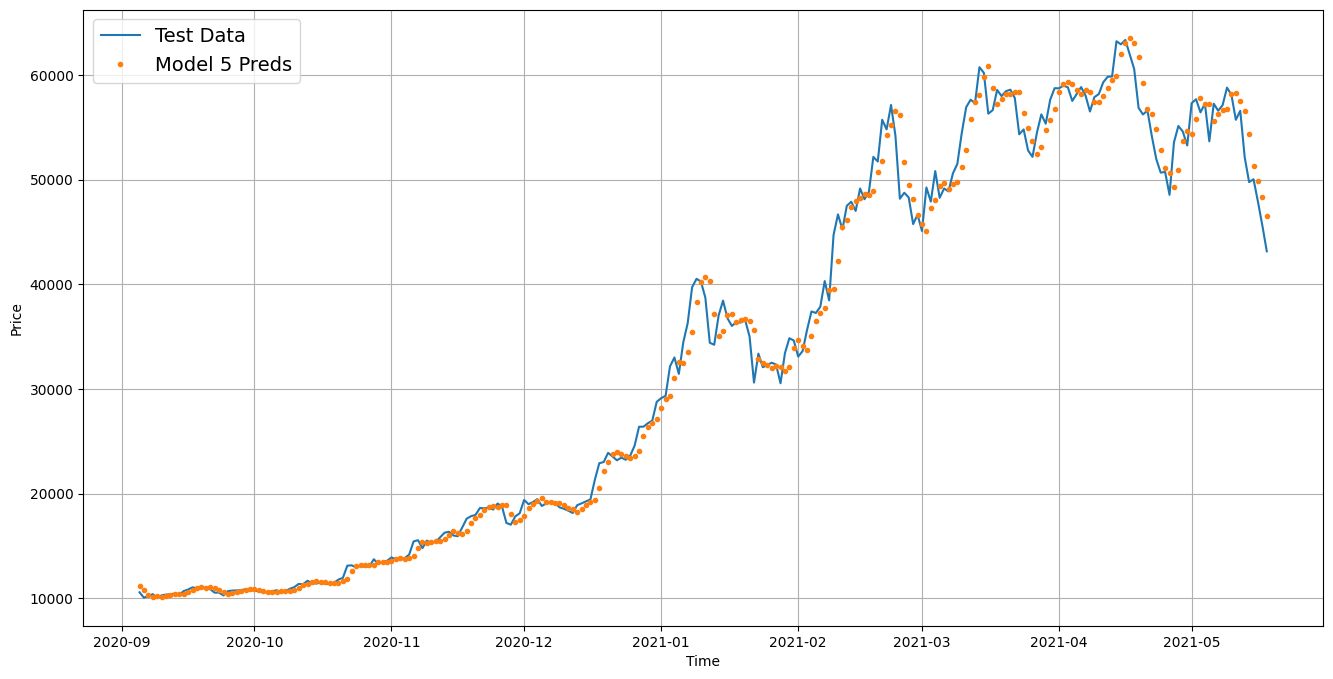

In [98]:
offset = 300
plt.figure(figsize=(16, 8))

timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=test_labels[:, 0], format="-", start=offset, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[-len(test_windows):], prices=model_5_preds, start=offset, end=None, label="Model 5 Preds")

##Model 6: Converting Univariate to multivariate

> Adding bitcoin halving event: Price may go up due to inflation.

In [99]:
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [100]:
block_reward_1 = 50 # 3 January 2009 (Not in our data set we start by 2013 october)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward Dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [101]:
block_reward_2_days = (block_reward_3_datetime - bitcoin.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [102]:
bitcoin_block = bitcoin.copy()
bitcoin_block["block_reward"] = None
bitcoin_block

,Price,block_reward
Date,,
2013-10-01,123.654990,None
2013-10-02,125.455000,None
2013-10-03,108.584830,None
2013-10-04,118.674660,None
2013-10-05,121.338660,None
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [103]:
bitcoin_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [104]:
bitcoin_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

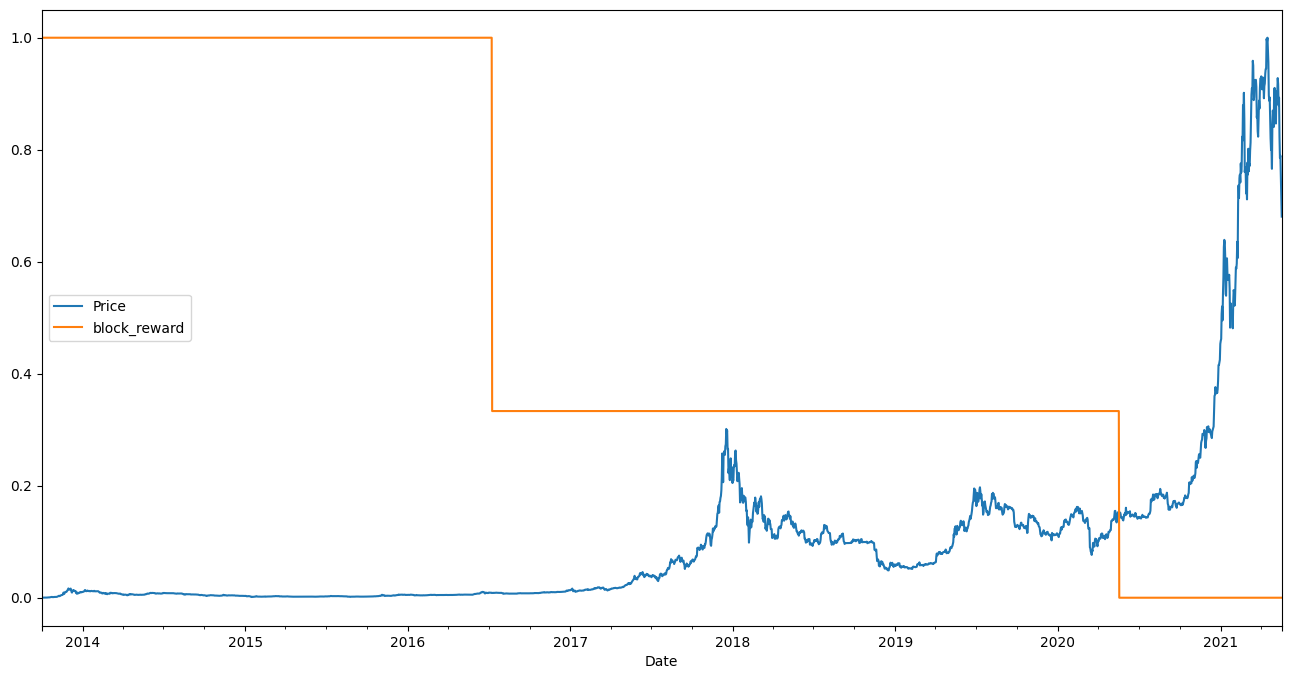

In [105]:
#Adjusting plot scale to plot price over time
from sklearn.preprocessing import minmax_scale
scaled_bitcoin = pd.DataFrame(minmax_scale(bitcoin_block[["Price", "block_reward"]]),
                              columns=bitcoin_block.columns,
                              index=bitcoin_block.index)
scaled_bitcoin.plot(figsize=(16, 8))

###Preparing our multivariate timeseies data for model training

In [106]:
WINDOW=7
HORIZON=1
bitcoin_block_windowed = bitcoin_block.copy()
for i in range(WINDOW):
  bitcoin_block_windowed[f"Price+{i+1}"] = bitcoin_block_windowed["Price"].shift(periods=i+1)
bitcoin_block_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


##### creating X windows and y horizon features in the following pattern
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7 block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8 block_reward] -> [9]

In [107]:
X = bitcoin_block_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_block_windowed.dropna()["Price"].astype(np.float32)
X

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.00,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.00,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.00,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.00,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.00,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2021-05-14,6.25,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.25,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.25,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [108]:
y

Date
2013-10-08      123.032997
2013-10-09      124.049004
2013-10-10      125.961159
2013-10-11      125.279663
2013-10-12      125.927498
                  ...     
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, Length: 2780, dtype: float32

In [109]:
#Making train test Split

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [110]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="Model_6_multi")

model_6.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae", "mse"])

history_6 = model_6.fit(X_train, y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 16s - loss: 4493.2378 - mae: 4493.2378 - mse: 41454692.0000

18/18 [==============================] - 2s 90ms/step - loss: 2567.0032 - mae: 2567.0032 - mse: 17828150.0000 - val_loss: 5412.5415 - val_mae: 5412.5415 - val_mse: 54163944.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 625.1931 - mae: 625.1931 - mse: 1260145.0000

18/18 [==============================] - 1s 32ms/step - loss: 396.3194 - mae: 396.3194 - mse: 572259.2500 - val_loss: 1167.5414 - val_mae: 1167.5414 - val_mse: 4536778.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 157.0938 - mae: 157.0938 - mse: 95023.7656

18/18 [==============================] - 1s 32ms/step - loss: 228.0834 - mae: 228.0834 - mse: 244932.2656 - val_loss: 1136.8334 - val_mae: 1136.8334 - val_mse: 4285432.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 277.4074 - mae: 277.4074 - mse: 392971.8438

18/18 [==============================] - 1s 42ms/step - loss: 201.0137 - mae: 201.0137 - mse: 205727.2500 - val_loss: 1069.5685 - val_mae: 1069.5685 - val_mse: 3842680.2500
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 193.6778 - mae: 193.6778 - mse: 196221.3438

18/18 [==============================] - 1s 45ms/step - loss: 188.0885 - mae: 188.0885 - mse: 184534.0312 - val_loss: 1027.0895 - val_mae: 1027.0895 - val_mse: 3517509.2500
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 181.3228 - mae: 181.3228 - mse: 162483.8125

18/18 [==============================] - 1s 48ms/step - loss: 184.1454 - mae: 184.1454 - mse: 178119.0625 - val_loss: 1018.6475 - val_mae: 1018.6475 - val_mse: 3488740.7500
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 185.3433 - mae: 185.3433 - mse: 184975.8750

18/18 [==============================] - 1s 44ms/step - loss: 178.4173 - mae: 178.4173 - mse: 168394.6406 - val_loss: 994.6592 - val_mae: 994.6592 - val_mse: 3211341.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 153.4117 - mae: 153.4117 - mse: 92712.8203

18/18 [==============================] - 1s 35ms/step - loss: 174.6864 - mae: 174.6864 - mse: 160704.2344 - val_loss: 960.6329 - val_mae: 960.6329 - val_mse: 3038723.7500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 169.1968 - mae: 169.1968 - mse: 154527.6250 - val_loss: 962.1821 - val_mae: 962.1821 - val_mse: 2935826.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 183.5249 - mae: 183.5249 - mse: 231324.0156

18/18 [==============================] - 1s 35ms/step - loss: 164.8950 - mae: 164.8950 - mse: 146901.2500 - val_loss: 908.0666 - val_mae: 908.0666 - val_mse: 2728875.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 177.9754 - mae: 177.9754 - mse: 126883.0938

18/18 [==============================] - 1s 36ms/step - loss: 160.1934 - mae: 160.1934 - mse: 138256.1875 - val_loss: 883.4968 - val_mae: 883.4968 - val_mse: 2619364.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 156.0792 - mae: 156.0792 - mse: 131643.0312 - val_loss: 965.0616 - val_mae: 965.0616 - val_mse: 2719329.0000
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 152.3509 - mae: 152.3509 - mse: 128001.1953

18/18 [==============================] - 1s 35ms/step - loss: 152.3509 - mae: 152.3509 - mse: 128001.1953 - val_loss: 856.6151 - val_mae: 856.6151 - val_mse: 2354014.0000
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 146.6846 - mae: 146.6846 - mse: 119553.7109 - val_loss: 874.7788 - val_mae: 874.7788 - val_mse: 2337120.7500
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 145.5103 - mae: 145.5103 - mse: 116918.3984 - val_loss: 862.0066 - val_mae: 862.0066 - val_mse: 2250224.0000
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 144.0204 - mae: 144.0204 - mse: 113966.6250

18/18 [==============================] - 1s 58ms/step - loss: 142.2630 - mae: 142.2630 - mse: 111864.5938 - val_loss: 792.7601 - val_mae: 792.7601 - val_mse: 2011250.1250
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6184 - mae: 128.6184 - mse: 77902.1406

18/18 [==============================] - 1s 37ms/step - loss: 138.4545 - mae: 138.4545 - mse: 106406.0625 - val_loss: 758.4436 - val_mae: 758.4436 - val_mse: 1912059.7500
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 134.4945 - mae: 134.4945 - mse: 101035.3438 - val_loss: 775.8546 - val_mae: 775.8546 - val_mse: 1894814.8750
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.5230 - mae: 130.5230 - mse: 97402.7422 - val_loss: 776.1038 - val_mae: 776.1038 - val_mse: 1869804.3750
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 130.3297 - mae: 130.3297 - mse: 97738.2344 

18/18 [==============================] - 1s 37ms/step - loss: 128.5740 - mae: 128.5740 - mse: 95881.3203 - val_loss: 720.1524 - val_mae: 720.1524 - val_mse: 1703381.6250
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 129.7807 - mae: 129.7807 - mse: 97114.1641 - val_loss: 730.5771 - val_mae: 730.5771 - val_mse: 1699608.3750
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 124.7602 - mae: 124.7602 - mse: 90845.4766 

18/18 [==============================] - 1s 37ms/step - loss: 124.7602 - mae: 124.7602 - mse: 90845.4766 - val_loss: 702.5291 - val_mae: 702.5291 - val_mse: 1609384.2500
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 123.8841 - mae: 123.8841 - mse: 86568.1250

18/18 [==============================] - 1s 33ms/step - loss: 123.0704 - mae: 123.0704 - mse: 88177.4766 - val_loss: 684.7059 - val_mae: 684.7059 - val_mse: 1579972.6250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8222 - mae: 130.8222 - mse: 85498.8281

18/18 [==============================] - 1s 35ms/step - loss: 123.2491 - mae: 123.2491 - mse: 89798.3125 - val_loss: 677.5654 - val_mae: 677.5654 - val_mse: 1556532.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 124.6107 - mae: 124.6107 - mse: 63097.5156

18/18 [==============================] - 1s 33ms/step - loss: 121.6295 - mae: 121.6295 - mse: 85027.2969 - val_loss: 666.3604 - val_mae: 666.3604 - val_mse: 1507138.6250
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9035 - mae: 121.9035 - mse: 68702.4219

18/18 [==============================] - 1s 37ms/step - loss: 121.6977 - mae: 121.6977 - mse: 85327.1875 - val_loss: 664.1374 - val_mae: 664.1374 - val_mse: 1504973.3750
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 122.6451 - mae: 122.6451 - mse: 85321.5391 

18/18 [==============================] - 1s 36ms/step - loss: 121.5724 - mae: 121.5724 - mse: 85159.9062 - val_loss: 652.1063 - val_mae: 652.1063 - val_mse: 1452230.0000
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 118.3260 - mae: 118.3260 - mse: 83883.0469

18/18 [==============================] - 1s 34ms/step - loss: 118.1436 - mae: 118.1436 - mse: 82849.7266 - val_loss: 648.1856 - val_mae: 648.1856 - val_mse: 1427599.5000
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 124.6566 - mae: 124.6566 - mse: 87711.1562 - val_loss: 667.5342 - val_mae: 667.5342 - val_mse: 1462440.3750
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 124.8506 - mae: 124.8506 - mse: 86949.8203 - val_loss: 708.6127 - val_mae: 708.6127 - val_mse: 1554427.8750
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 127.5302 - mae: 127.5302 - mse: 87127.8359 - val_loss: 838.8672 - val_mae: 838.8672 - val_mse: 1949706.1250
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 124.2310 - mae: 124.2310 - mse: 85758.3359 - val_loss: 701.9816 - val_mae: 701.9816 - val_mse: 1530351.2500
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 115.5831 - mae: 115.5831 - mse: 

18/18 [==============================] - 1s 49ms/step - loss: 116.3007 - mae: 116.3007 - mse: 79488.6797 - val_loss: 643.1620 - val_mae: 643.1620 - val_mse: 1393789.6250
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 118.9047 - mae: 118.9047 - mse: 89216.6406 

18/18 [==============================] - 1s 50ms/step - loss: 115.4706 - mae: 115.4706 - mse: 80858.3359 - val_loss: 625.2978 - val_mae: 625.2978 - val_mse: 1361590.8750
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 115.6841 - mae: 115.6841 - mse: 80814.8672 - val_loss: 627.2716 - val_mae: 627.2716 - val_mse: 1355229.5000
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 119.2539 - mae: 119.2539 - mse: 80592.6797 - val_loss: 651.9937 - val_mae: 651.9937 - val_mse: 1401325.7500
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 114.7283 - mae: 114.7283 - mse: 79998.3125 

18/18 [==============================] - 1s 39ms/step - loss: 116.6862 - mae: 116.6862 - mse: 80654.2656 - val_loss: 622.5596 - val_mae: 622.5596 - val_mse: 1357063.1250
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 114.2324 - mae: 114.2324 - mse: 79261.3047

18/18 [==============================] - 1s 35ms/step - loss: 114.2324 - mae: 114.2324 - mse: 79261.3047 - val_loss: 614.4254 - val_mae: 614.4254 - val_mse: 1327816.2500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 136.7582 - mae: 136.7582 - mse: 121407.7812

18/18 [==============================] - 1s 35ms/step - loss: 113.9409 - mae: 113.9409 - mse: 78603.8203 - val_loss: 612.4047 - val_mae: 612.4047 - val_mse: 1319427.0000
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 113.0386 - mae: 113.0386 - mse: 77276.6172 

18/18 [==============================] - 1s 34ms/step - loss: 113.0386 - mae: 113.0386 - mse: 77276.6172 - val_loss: 609.9535 - val_mae: 609.9535 - val_mse: 1312042.3750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4031 - mae: 116.4031 - mse: 78681.1406 - val_loss: 686.6119 - val_mae: 686.6119 - val_mse: 1539185.2500
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9921 - mae: 120.9921 - mse: 83095.8203 - val_loss: 612.1283 - val_mae: 612.1283 - val_mse: 1320846.0000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4033 - mae: 112.4033 - mse: 76476.6406 - val_loss: 615.7274 - val_mae: 615.7274 - val_mse: 1330645.5000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8975 - mae: 113.8975 - mse: 77203.6250 - val_loss: 619.9100 - val_mae: 619.9100 - val_mse: 1340852.1250
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6956 - mae: 115.6956 - m

18/18 [==============================] - 1s 37ms/step - loss: 113.5661 - mae: 113.5661 - mse: 76097.9219 - val_loss: 603.4293 - val_mae: 603.4293 - val_mse: 1291958.5000
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8193 - mae: 113.8193 - mse: 78398.7422 - val_loss: 684.8966 - val_mae: 684.8966 - val_mse: 1455471.2500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9438 - mae: 114.9438 - mse: 76767.3203 - val_loss: 699.3215 - val_mae: 699.3215 - val_mse: 1489429.6250
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 117.4167 - mae: 117.4167 - mse: 77650.4609 

18/18 [==============================] - 1s 36ms/step - loss: 117.4167 - mae: 117.4167 - mse: 77650.4609 - val_loss: 601.8611 - val_mae: 601.8611 - val_mse: 1282643.1250
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2475 - mae: 110.2475 - mse: 75358.9453 - val_loss: 611.3597 - val_mae: 611.3597 - val_mse: 1312823.2500
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8581 - mae: 110.8581 - mse: 73351.4922 - val_loss: 605.9999 - val_mae: 605.9999 - val_mse: 1284516.1250
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9756 - mae: 111.9756 - mse: 76400.6875 - val_loss: 602.7812 - val_mae: 602.7812 - val_mse: 1287670.0000
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8342 - mae: 111.8342 - mse: 75502.6562 - val_loss: 630.4393 - val_mae: 630.4393 - val_mse: 1325440.0000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3655 - mae: 115.3655 - m

18/18 [==============================] - 1s 33ms/step - loss: 109.6593 - mae: 109.6593 - mse: 73760.6797 - val_loss: 599.9297 - val_mae: 599.9297 - val_mse: 1260876.6250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8740 - mae: 109.8740 - mse: 74784.2266 - val_loss: 601.8251 - val_mae: 601.8251 - val_mse: 1261947.1250
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 69.6831 - mae: 69.6831 - mse: 30804.1289

18/18 [==============================] - 1s 34ms/step - loss: 109.5830 - mae: 109.5830 - mse: 73083.6797 - val_loss: 594.2185 - val_mae: 594.2185 - val_mse: 1255880.8750
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4971 - mae: 109.4971 - mse: 73472.6328 - val_loss: 634.0391 - val_mae: 634.0391 - val_mse: 1322723.6250
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7509 - mae: 110.7509 - mse: 73842.0391 - val_loss: 684.7233 - val_mae: 684.7233 - val_mse: 1433710.7500
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3499 - mae: 115.3499 - mse: 77406.4922 - val_loss: 606.2362 - val_mae: 606.2362 - val_mse: 1267449.7500
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.2454 - mae: 116.2454 - mse: 75138.0000

18/18 [==============================] - 1s 53ms/step - loss: 111.6762 - mae: 111.6762 - mse: 73658.3047 - val_loss: 587.6348 - val_mae: 587.6348 - val_mse: 1234768.7500
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8629 - mae: 107.8629 - mse: 71925.3281 - val_loss: 617.8329 - val_mae: 617.8329 - val_mse: 1310569.8750
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0947 - mae: 115.0947 - mse: 73100.2656 - val_loss: 686.0787 - val_mae: 686.0787 - val_mse: 1497611.0000
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 126.2070 - mae: 126.2070 - mse: 83307.9844 - val_loss: 667.4753 - val_mae: 667.4753 - val_mse: 1439565.8750
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3152 - mae: 120.3152 - mse: 79471.5781 - val_loss: 598.2520 - val_mae: 598.2520 - val_mse: 1259884.5000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2612 - mae: 110.2612 - m

18/18 [==============================] - 1s 36ms/step - loss: 108.2700 - mae: 108.2700 - mse: 72464.5000 - val_loss: 583.9393 - val_mae: 583.9393 - val_mse: 1220542.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9956 - mae: 109.9956 - mse: 71538.4062 - val_loss: 608.0252 - val_mae: 608.0252 - val_mse: 1263410.8750
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3735 - mae: 113.3735 - mse: 74349.0234 - val_loss: 590.8322 - val_mae: 590.8322 - val_mse: 1229475.6250
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7330 - mae: 113.7330 - mse: 73949.8906 - val_loss: 588.2102 - val_mae: 588.2102 - val_mse: 1230545.5000
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4428 - mae: 107.4428 - mse: 70764.6562 - val_loss: 584.1914 - val_mae: 584.1914 - val_mse: 1220225.3750
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8010 - mae: 107.8010 - m

18/18 [==============================] - 1s 43ms/step - loss: 108.4472 - mae: 108.4472 - mse: 72561.5781 - val_loss: 582.0488 - val_mae: 582.0488 - val_mse: 1211698.6250
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 108.4581 - mae: 108.4581 - mse: 71993.8750 - val_loss: 613.9426 - val_mae: 613.9426 - val_mse: 1289634.5000
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 116.9774 - mae: 116.9774 - mse: 78228.4844 - val_loss: 647.0124 - val_mae: 647.0124 - val_mse: 1372413.8750
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0278 - mae: 108.0278 - mse: 71306.1719 - val_loss: 622.0757 - val_mae: 622.0757 - val_mse: 1308229.5000
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9259 - mae: 109.9259 - mse: 73971.2734 - val_loss: 583.4919 - val_mae: 583.4919 - val_mse: 1211551.1250
Epoch 85/100
13/18 [====================>.........] - ETA: 0s - loss: 103.6056 - mae: 103.6056 - mse: 

18/18 [==============================] - 1s 47ms/step - loss: 107.3414 - mae: 107.3414 - mse: 71632.8047 - val_loss: 581.5275 - val_mae: 581.5275 - val_mse: 1208216.6250
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5724 - mae: 107.5724 - mse: 71052.0938 - val_loss: 623.9747 - val_mae: 623.9747 - val_mse: 1288014.8750
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 107.1135 - mae: 107.1135 - mse: 69184.7891 - val_loss: 627.1584 - val_mae: 627.1584 - val_mse: 1317012.2500
Epoch 88/100
12/18 [===================>..........] - ETA: 0s - loss: 112.2209 - mae: 112.2209 - mse: 80524.4453 

18/18 [==============================] - 1s 46ms/step - loss: 108.6275 - mae: 108.6275 - mse: 73064.4531 - val_loss: 581.1760 - val_mae: 581.1760 - val_mse: 1208002.6250
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9769 - mae: 106.9769 - mse: 69898.9141 - val_loss: 585.7319 - val_mae: 585.7319 - val_mse: 1212173.1250
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1134 - mae: 107.1134 - mse: 68538.7109 - val_loss: 590.0566 - val_mae: 590.0566 - val_mse: 1219494.5000
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1486 - mae: 109.1486 - mse: 71914.6172 - val_loss: 635.5768 - val_mae: 635.5768 - val_mse: 1336604.1250
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3871 - mae: 109.3871 - mse: 72539.4531 - val_loss: 583.9487 - val_mae: 583.9487 - val_mse: 1213789.7500
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0758 - mae: 114.0758 - m

18/18 [==============================] - 1s 34ms/step - loss: 107.6165 - mae: 107.6165 - mse: 70081.0469 - val_loss: 577.1238 - val_mae: 577.1238 - val_mse: 1194872.2500
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5466 - mae: 115.5466 - mse: 75397.0703 - val_loss: 614.3698 - val_mae: 614.3698 - val_mse: 1282761.6250
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4255 - mae: 108.4255 - mse: 72009.0547 - val_loss: 597.0689 - val_mae: 597.0689 - val_mse: 1243617.6250
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4439 - mae: 110.4439 - mse: 71823.6328 - val_loss: 590.7148 - val_mae: 590.7148 - val_mse: 1218338.2500
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6422 - mae: 111.6422 - mse: 72878.5000 - val_loss: 582.0193 - val_mae: 582.0193 - val_mse: 1202348.3750
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3200 - mae: 107.3200 - 

In [ ]:
model_6.evaluate(X_test, y_test)

In [ ]:
Model_6 = tf.keras.models.load_model("model_experiments/Model_6_multi")
Model_6.evaluate(X_test, y_test)

In [ ]:
model_6_preds = tf.squeeze(Model_6.predict(X_test))
model_6_preds[:10]

In [ ]:
model_6_results  = time_series_evaluation_metrics(y_test, model_6_preds)
model_6_results

## Model 7: N-Beats algorithm

### Building and testing the block layer

To create custom layers and models in TensorFlow we can use subclassing. It is the case when Tensorflow have no builtin block of that layer. In our case N-beat have no block of layer.

https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int, **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Logic of our code. Block contain stack of 4 FC layers each has ReLU activation.

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    # now to pass input to output it is mandatory to use call method.
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
#CHecking NBeatsBlock by dummy input and output
WINDOW_SIZE = 7
HORIZON = 1
dummy_nbeat = NBeatsBlock(input_size=WINDOW_SIZE, 
                          theta_size=WINDOW_SIZE+HORIZON, 
                          horizon=HORIZON,
                          n_neurons=128,
                          n_layers=4)

In [ ]:
# creating dummy input

dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_input

In [ ]:
backcast, forecast = dummy_nbeat.call(dummy_input)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

### Preparing data with tf.data API

In [122]:
WINDOW_SIZE = 7
HORIZON = 1

bitcoin_nbeats = bitcoin.copy()
for i in range(WINDOW_SIZE):
  bitcoin_nbeats[f"Price+{i+1}"] = bitcoin_nbeats["Price"].shift(periods=i+1)

bitcoin_nbeats

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [123]:
X = bitcoin_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8 )
X_train, y_train = X[:split_size], y[:split_size] 
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to use tf.data API for creating input pipelines

